## Data description<a name="1.1"></a>

- This contains movies from TMBD(The Movie Database) from the year 1961. It contains 21 relevant attributes. 


### Attribute information:

##### Movie data
    1. ID: Movie ID
    2. Popularity: Popularity score
    3. Budget: Amount spent to make the movie
    4. Revenue: Amount realized from the movie
    5. original title: Movie title
    6. Cast: Actors & Actresses in the movie
    7. Homepage: Movie website
    8. Director: Director(s) of the movie
    9. Tagline: Catchphrase(s)/slogan of the movie
    10. keywords: Words associated with a movie
    11. Overview: Movie Summary
    12. Runtime: length of a movie
    13. Genres: Category
    14. Production companies: Companies that produced the movie
    15. Release date: Date movie was released
    16. Vote count: number of votes
    17. Vote average: average score of votes
    18. Release year: year movie was released
    19. Budget adj: Budget In terms of 2010 dollars
    20 Revenue adj: Revenue in terms of 2010 dollars

##### output variable (desired target):
    21. Profit -  Revenue minus Budget
    
## Problem statement and objective
This is a classification task where we want to predict whether a movie will make profit based on the primary properties of the movie : Budget, Original Title, Cast, Director, Keywords, Overview, Runtime, Genres, Production Companies, Release Date, popularity, vote counts and vote average. We will omit factors directly related to profit like revenue. 

In [276]:
# import libraries and run a few checks
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

import seaborn as sns
sns.set(palette='Paired', style='white')

import warnings 
warnings.filterwarnings('ignore')

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

# utility function to save figures for presentation
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Load dataset

In [277]:
dataset = pd.read_csv('TMBD Movie Dataset.csv')

In [278]:
pd.set_option('display.max_columns', None)
dataset.head(5)

Unnamed: 0      id    imdb_id  popularity       budget       revenue  \
0           0  135397  tt0369610   32.985763  150000000.0  1.513529e+09   
1           1   76341  tt1392190   28.419936  150000000.0  3.784364e+08   
2           2  262500  tt2908446   13.112507  110000000.0  2.952382e+08   
3           3  140607  tt2488496   11.173104  200000000.0  2.068178e+09   
4           4  168259  tt2820852    9.335014  190000000.0  1.506249e+09   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  \
0              The park is open.   
1             What a Lovely Day.   
2     One Choice Can Destroy You   
3  Every generation has a story.   
4            Vengeance Hits Home   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   
3  Thirty years after defeating the Galactic Empi...      136   
4  Deckard Shaw seeks revenge against Dominic Tor...      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15        5292   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01        2947   

   vote_average  release_year    budget_adj   revenue_adj        profit  \
0           6.5          2015  1.379999e+08  1.392446e+09  1.363529e+09   
1           7.1          2015  1.379999e+08  3.481613e+08  2.284364e+08   
2           6.3          2015  1.012000e+08  2.716190e+08  1.852382e+08   
3           7.5          2015  1.839999e+08  1.902723e+09  1.868178e+09   
4           7.3          2015  1.747999e+08  1.385749e+09  1.316249e+09   

  popularity_level  
0             High  
1             High  
2             High  
3             High  
4             High

In [279]:
dataset.shape

(1287, 24)

### remove nan

In [280]:
missing_values = dataset.isna().sum()

In [281]:
missing_values 

Unnamed: 0              0
id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
profit                  0
popularity_level        1
dtype: int64

remove the NaN from target group : popularity_level

In [282]:
dataset = dataset.loc[dataset["popularity_level"].isna() == False]

## Exploratory data analysis

In [283]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1286 entries, 0 to 1286
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1286 non-null   int64  
 1   id                    1286 non-null   int64  
 2   imdb_id               1286 non-null   object 
 3   popularity            1286 non-null   float64
 4   budget                1286 non-null   float64
 5   revenue               1286 non-null   float64
 6   original_title        1286 non-null   object 
 7   cast                  1286 non-null   object 
 8   homepage              1286 non-null   object 
 9   director              1286 non-null   object 
 10  tagline               1286 non-null   object 
 11  keywords              1286 non-null   object 
 12  overview              1286 non-null   object 
 13  runtime               1286 non-null   int64  
 14  genres                1286 non-null   object 
 15  production_companies 

In [284]:
# numerical columns
num_cols = dataset.describe().columns.to_list()[:]
dataset.describe()

Unnamed: 0             id   popularity        budget       revenue  \
count   1286.000000    1286.000000  1286.000000  1.286000e+03  1.286000e+03   
mean    4124.335148   52439.889580     1.787403  5.202060e+07  1.763285e+08   
std     2672.428163   74359.358936     2.172417  5.516344e+07  2.538964e+08   
min        0.000000      11.000000     0.015997  1.000000e+00  4.300000e+01   
25%     1971.500000    5851.250000     0.666532  1.400000e+07  2.560695e+07   
50%     3522.500000   20113.000000     1.152386  3.200000e+07  8.212852e+07   
75%     6554.750000   62198.750000     2.127070  7.000000e+07  2.140870e+08   
max    10760.000000  333348.000000    32.985763  4.250000e+08  2.781506e+09   

           runtime   vote_count  vote_average  release_year    budget_adj  \
count  1286.000000  1286.000000   1286.000000   1286.000000  1.286000e+03   
mean    110.257387   947.953344      6.280093   2007.012442  5.465058e+07   
std      18.809796  1255.722722      0.795968      8.061910  5.527116e+07   
min      63.000000    10.000000      2.200000   1961.000000  9.693980e-01   
25%      97.000000   179.250000      5.800000   2005.000000  1.519180e+07   
50%     107.000000   439.500000      6.300000   2009.000000  3.557164e+07   
75%     121.000000  1173.500000      6.800000   2011.000000  7.633686e+07   
max     201.000000  9767.000000      8.300000   2015.000000  4.250000e+08   

        revenue_adj        profit  
count  1.286000e+03  1.286000e+03  
mean   1.992828e+08  1.243079e+08  
std    2.969429e+08  2.184179e+08  
min    4.300000e+01 -4.139124e+08  
25%    2.754364e+07  3.133386e+06  
50%    8.689619e+07  4.532795e+07  
75%    2.351241e+08  1.471200e+08  
max    2.827124e+09  2.544506e+09

In [285]:
# non-numerical columns
cat_cols = dataset.describe(include=['O']).columns.to_list()
dataset.describe(include=['O'])

imdb_id original_title  \
count        1286           1286   
unique       1286           1279   
top     tt0369610      Halloween   
freq            1              2   

                                                     cast  \
count                                                1286   
unique                                               1277   
top     Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...   
freq                                                    3   

                                homepage        director  \
count                               1286            1286   
unique                              1265             788   
top     http://www.thehungergames.movie/  John Carpenter   
freq                                   4              12   

                           tagline              keywords  \
count                         1286                  1286   
unique                        1282                  1271   
top     Love is a force of nature.  duringcreditsstinger   
freq                             2                     6   

                                                 overview genres  \
count                                                1286   1286   
unique                                               1286    496   
top     Twenty-two years after the events of Jurassic ...  Drama   
freq                                                    1     76   

                                production_companies release_date  \
count                                           1286         1286   
unique                                          1137         1080   
top     Walt Disney Pictures|Pixar Animation Studios   2014-12-25   
freq                                              12            5   

       popularity_level  
count              1286  
unique                4  
top                High  
freq                322

In [286]:
dataset['release_date'] = pd.to_datetime(dataset['release_date'])

In [287]:
num_cols.append('release_date')

In [288]:
num_cols.remove('Unnamed: 0')
num_cols.remove('id')
num_cols.remove("release_date")

In [289]:
num_cols

['popularity',
 'budget',
 'revenue',
 'runtime',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj',
 'profit']

### Visualization of numerical features

In [290]:
num_cols

['popularity',
 'budget',
 'revenue',
 'runtime',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj',
 'profit']

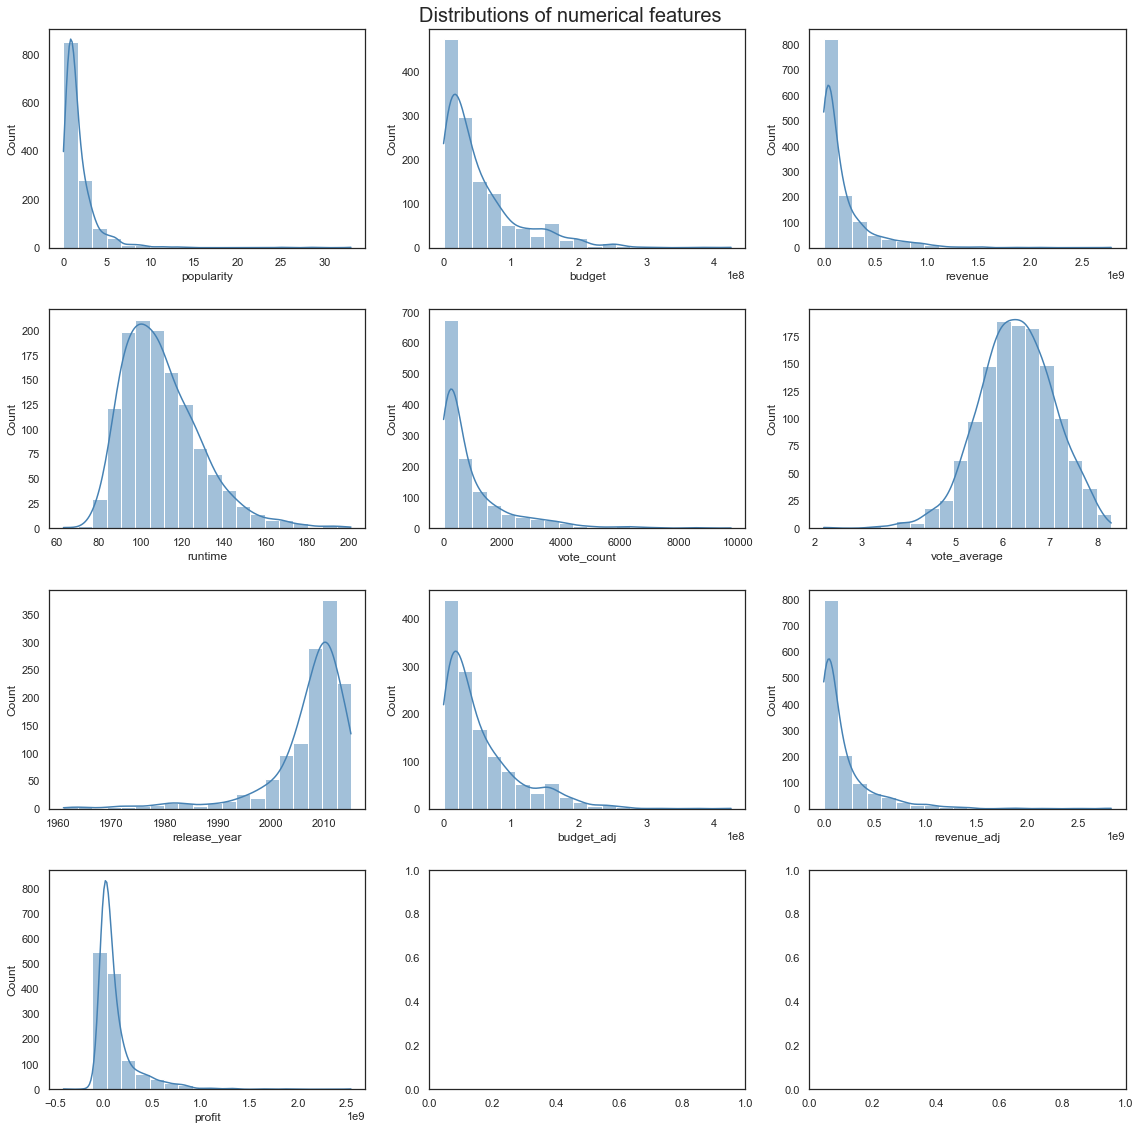

In [291]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 16))
for col, ax in zip(num_cols, axes.flat):
    sns.histplot(x=col, data=dataset, bins=20, kde=True, ax=ax, color='steelblue')
fig.suptitle('Distributions of numerical features', fontsize=20)
plt.tight_layout(h_pad=2)

#save_fig("num_cols_distribution_plots")

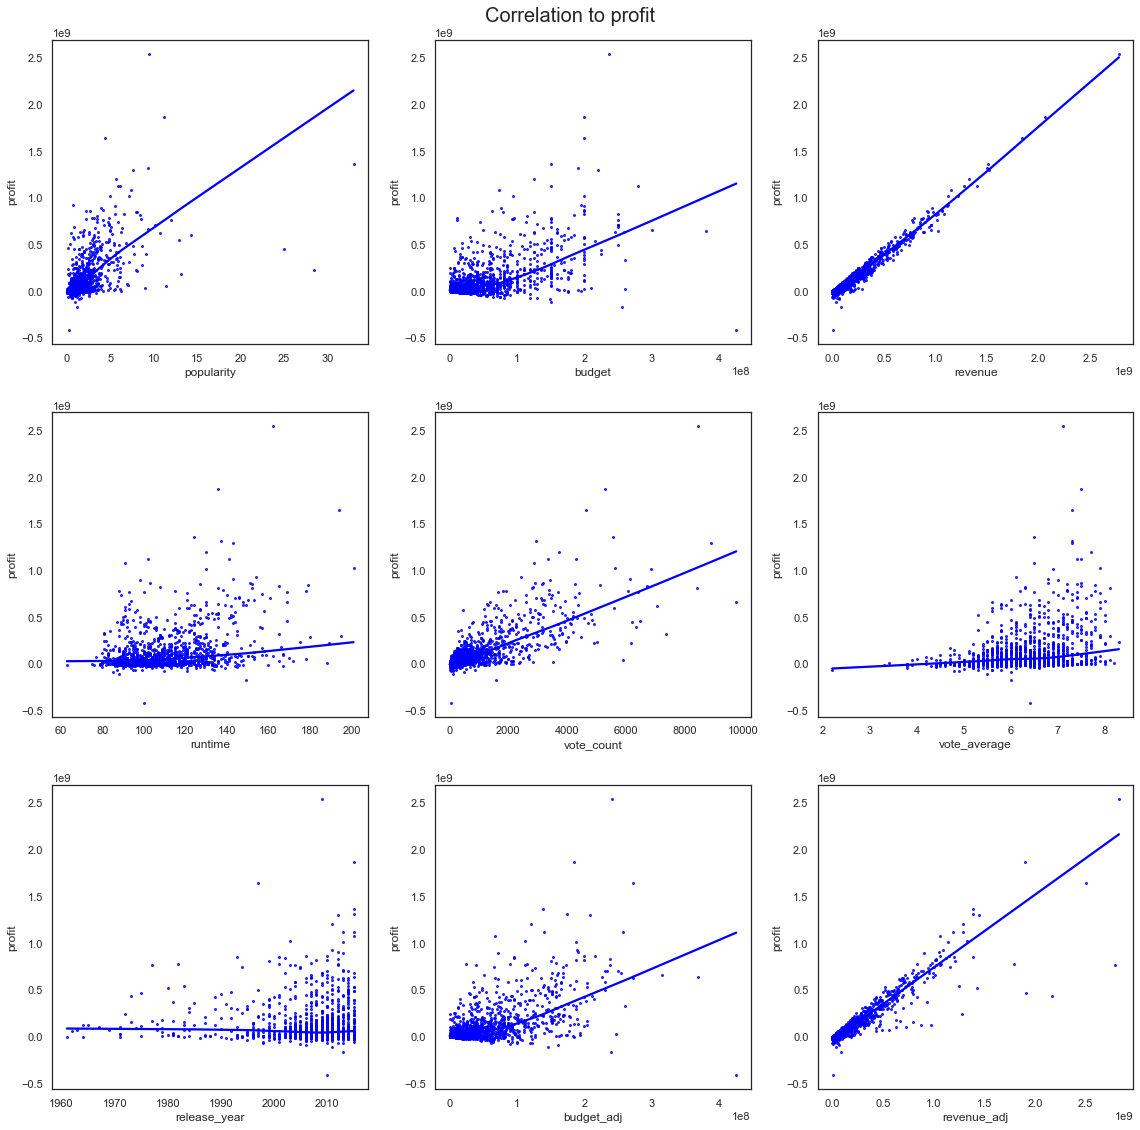

In [294]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
for col, ax in zip(num_cols, axes.flat):
    sns.regplot(data=dataset, x=col, y="profit", lowess=True, scatter=True, color='blue',ax=ax,scatter_kws={'s': 4, 'marker': '.'})
fig.suptitle('Correlation to profit', fontsize=20)
plt.tight_layout(h_pad=2)

next we find the relationship between popularity and target group popularity_level

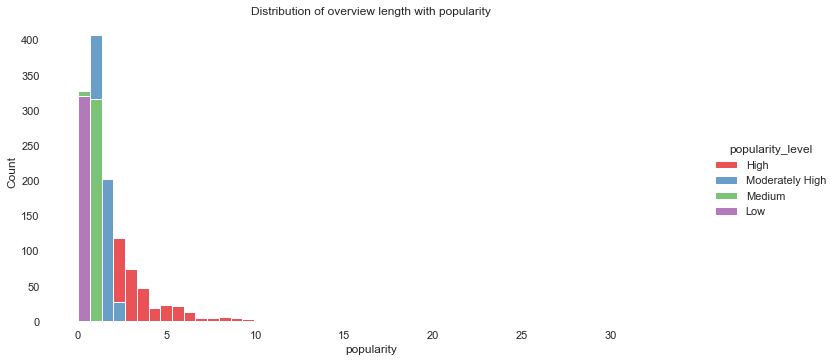

In [38]:
sns.displot(data=dataset, kind='hist', x='popularity', hue='popularity_level', bins=50,
            multiple='stack', height=5, aspect=2, palette='Set1')
sns.despine(left=True, bottom=True)
plt.title('Distribution of overview length with popularity');

popularity is feature directly related to popularity level, we consider budget revenue, runtime, vote_count as training features

In [39]:
training_features = ["budget_adj","runtime","vote_count", "vote_average", "popularity", "popularity_level"]

### Vsualization of movie popularity

For some of the attributes such as popularity, budget, revenue and profit, there are outliers data points with 1 or 2 movies having very large numbers. We can choose to discretize them into groups based on quantiles. Doing so will remove the effect of outlier points skewing the model, however it will also cause some loss of information as we know that budget and popularity are closely linked to profit. Therefore, at this stage we will keep both original and discretized attributes and test in during modelling phase.

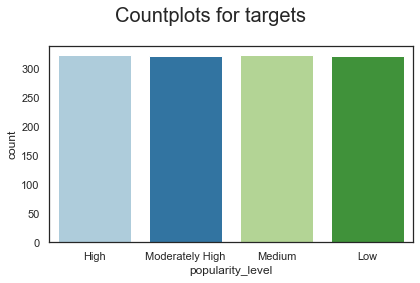

In [40]:
# see target spread
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
sns.countplot(x=dataset["popularity_level"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()

target groups are evenly spread, this is a balanced dataset

### Vsualization of profit

In [41]:
# try discretize thalch into groups
min_profit = dataset.profit.min()
max_profit = dataset.profit.max()
print(min_profit, max_profit)

-413912431.0 2544505847.0


Text(0.5, 0.98, 'Distributions of profit')

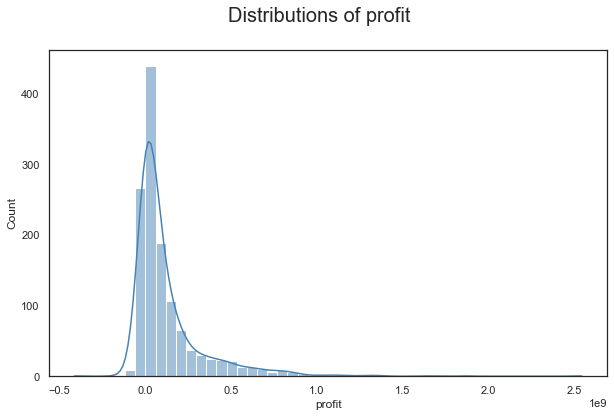

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.histplot(x="profit", data=dataset, bins=50, kde=True, ax=ax, color='steelblue')
fig.suptitle('Distributions of profit', fontsize=20)

In [43]:
q1 = np.percentile(dataset["profit"].values, 25)
q2 = np.percentile(dataset["profit"].values, 50)
q3 = np.percentile(dataset["profit"].values, 75)
print(q1,q2,q3)

3133385.5 45327949.0 147120040.75


In [44]:
dataset['profit_groups_1'] = pd.cut(dataset.profit, bins=[
    min_profit+10*min_profit, 
    0, 
    0.44*10**8, 
    1.4*10**8,   
    max_profit*10
])

In [45]:
# check out each age group's size and proportion of subscribing (y=1)
profit_groups = dataset.pivot_table(index='profit_groups_1', values='popularity', aggfunc=[np.size, np.mean]).reset_index()
profit_groups.columns = ['profit_groups_1', 'size', 'popularity']
profit_groups

profit_groups_1  size  popularity
0          (-4553036741.0, 0.0]   265    0.746435
1             (0.0, 44000000.0]   372    1.137016
2     (44000000.0, 140000000.0]   313    1.571816
3  (140000000.0, 25445058470.0]   336    3.529306

In [46]:
def preprocess_group(x):
    if x == '(-4553036741.0, 0.0]':
        return 0
    elif x == '(0.0, 44000000.0]':
        return 1
    elif x == '(44000000.0, 140000000.0]':
        return 2
    elif x == '(140000000.0, 25445058470.0]':
        return 3

In [47]:
dataset["profit_groups_1"] = dataset["profit_groups_1"].astype("str")
dataset["profit_groups"] = dataset["profit_groups_1"].apply(lambda x : preprocess_group(x))

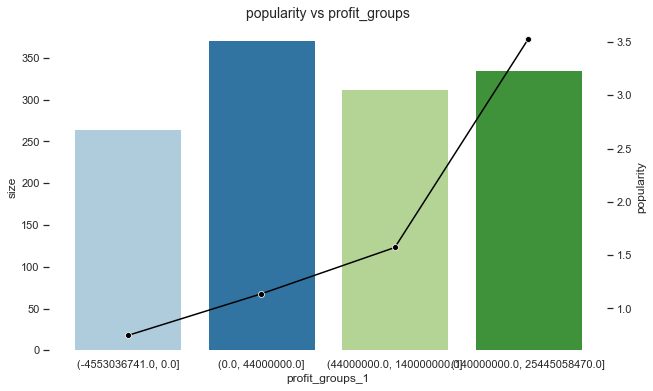

In [48]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(data=profit_groups, x='profit_groups_1', y='size', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data=profit_groups['popularity'], marker='o', color='black', sort = False, ax=ax2)
sns.despine(left=True, bottom=True)
plt.title('popularity vs profit_groups', fontsize=14);

target groups are evenly spread, this is a balanced dataset, more popular movie is more profitable

we create another target group called profitability, with 1 meaning the movie is profitable and 0 meaning the movie made a loss

In [49]:
def preprocess_group2(x):
    if x < 0:
        return 0
    else:
        return 1

In [50]:
dataset["profitability"] = dataset["profit"].apply(lambda x : preprocess_group2(x))

In [51]:
# check out each age group's size and proportion of subscribing (y=1)
profitability_groups = dataset.pivot_table(index='profitability', values='popularity', aggfunc=[np.size, np.mean]).reset_index()
profitability_groups.columns = ['profitability', 'size', 'popularity']
profitability_groups

profitability  size  popularity
0              0   265    0.746435
1              1  1021    2.057585

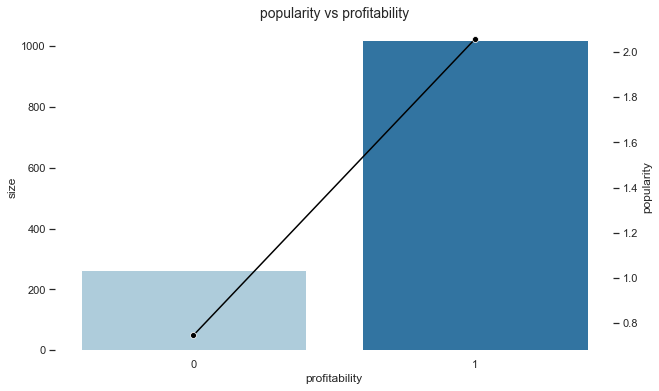

In [52]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(data=profitability_groups, x="profitability", y='size', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data=profitability_groups['popularity'], marker='o', color='black', sort = False, ax=ax2)
sns.despine(left=True, bottom=True)
plt.title('popularity vs profitability', fontsize=14);

### Visualization of movie over time

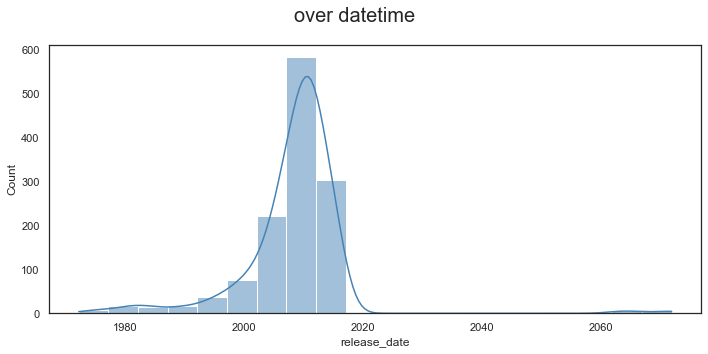

In [53]:
dataset['release_date'] = pd.to_datetime(dataset['release_date'])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.histplot(x='release_date', data=dataset, bins=20, kde=True, ax=ax, color='steelblue')
fig.suptitle('over datetime', fontsize=20)
plt.tight_layout(h_pad=2)


notice that there are erroneous entries, we need to correct the entries based on their years

In [54]:
max_date_threshold =  pd.to_datetime('2024-03-30')
dataset.loc[dataset["release_date"] >= max_date_threshold]

Unnamed: 0     id    imdb_id  popularity      budget      revenue  \
1259        9849    646  tt0055928    3.170651   1100000.0   59600000.0   
1260        9881    658  tt0058150    3.153791   3500000.0  124900000.0   
1261        9884    704  tt0058182    0.812194    500000.0    1000549.0   
1262        9925    681  tt0066995    1.755117   7200000.0  116000000.0   
1263        9927    984  tt0066999    0.885391   4000000.0   35976000.0   
1264        9932    636  tt0066434    0.627942    777000.0    2437000.0   
1265        9951  25188  tt0067328    0.369308   1300000.0   29133000.0   
1270       10131    430  tt0055256    0.303783   3000000.0    4000000.0   
1278       10401    667  tt0062512    1.554808   9500000.0  111584787.0   
1279       10438    657  tt0057076    2.508235   2500000.0   78898765.0   
1283       10689    660  tt0059800    1.910465  11000000.0  141195658.0   
1284       10724    668  tt0064757    1.778746   7000000.0   81974493.0   

                       original_title  \
1259                           Dr. No   
1260                       Goldfinger   
1261               A Hard Day's Night   
1262             Diamonds Are Forever   
1263                      Dirty Harry   
1264                         THX 1138   
1265            The Last Picture Show   
1270                  One, Two, Three   
1278              You Only Live Twice   
1279            From Russia With Love   
1283                      Thunderball   
1284  On Her Majesty's Secret Service   

                                                   cast  \
1259  Sean Connery|Ursula Andress|Joseph Wiseman|Jac...   
1260  Sean Connery|Honor Blackman|Gert FrÃ¶be|Shirle...   
1261  John Lennon|Paul McCartney|George Harrison|Rin...   
1262  Sean Connery|Jill St. John|Charles Gray|Lana W...   
1263  Clint Eastwood|Harry Guardino|Reni Santoni|Joh...   
1264  Robert Duvall|Donald Pleasence|Don Pedro Colle...   
1265  Timothy Bottoms|Jeff Bridges|Cybill Shepherd|B...   
1270  James Cagney|Liselotte Pulver|Horst Buchholz|P...   
1278  Sean Connery|Akiko Wakabayashi|Karin Dor|Mie H...   
1279  Sean Connery|Daniela Bianchi|Lotte Lenya|Rober...   
1283  Sean Connery|Claudine Auger|Adolfo Celi|Lucian...   
1284  George Lazenby|Diana Rigg|Telly Savalas|Gabrie...   

                                               homepage           director  \
1259          http://www.mgm.com/view/movie/566/Dr.-No/      Terence Young   
1260      http://www.mgm.com/view/movie/760/Goldfinger/       Guy Hamilton   
1261     http://www.thebeatles.com/film/hard-days-night     Richard Lester   
1262  http://www.mgm.com/view/movie/529/Diamonds-Are...       Guy Hamilton   
1263             http://www.warnerbros.com/dirty-harry/         Don Siegel   
1264                       http://www.thx1138movie.com/       George Lucas   
1265                 http://www.filmsite.org/lastp.html  Peter Bogdanovich   
1270       http://en.wikipedia.org/wiki/One,_Two,_Three       Billy Wilder   
1278  http://www.mgm.com/view/movie/2347/You-Only-Li...      Lewis Gilbert   
1279  http://www.mgm.com/view/movie/717/From-Russia-...      Terence Young   
1283    http://www.mgm.com/view/movie/2009/Thunderball/      Terence Young   
1284  http://www.mgm.com/view/movie/1411/On-Her-Maje...      Peter R. Hunt   

                                                tagline  \
1259  NOW meet the most extraordinary gentleman spy ...   
1260       Everything he touches turns into excitement!   
1261  The Beatles, starring in their first full-leng...   
1262            The man who made 007 a household number   
1263  Detective Harry Callahan. He doesn't break mur...   
1264  Visit the future where love is the ultimate cr...   
1265  Anarene, Texas, 1951. Nothing much has changed...   
1270                Billy Wilder's Explosive New Comedy   
1278  You Only Live Twice...and Twice is the only wa...   
1279  The world's masters of murder pull out all the...   
1283                    Look up!  Look down!  Look out!   
1284 

In [55]:
for index, row in dataset.loc[dataset["release_date"] >= max_date_threshold].iterrows():
    dataset.at[index,"release_date"] = pd.to_datetime(f'{str(row["release_year"])}-{str(row["release_date"].month)}-{str(row["release_date"].day)}')


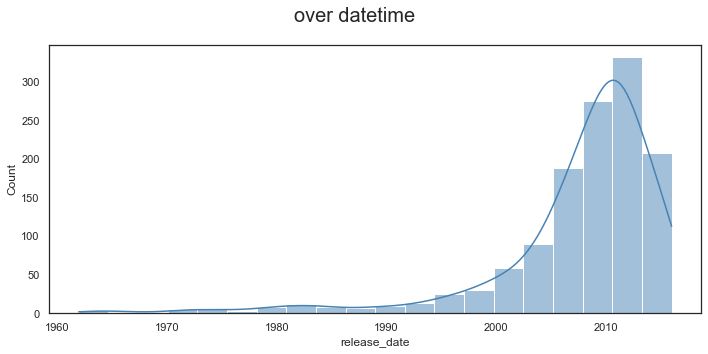

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))    
sns.histplot(x='release_date', data=dataset, bins=20, kde=True, ax=ax, color='steelblue')
fig.suptitle('over datetime', fontsize=20)
plt.tight_layout(h_pad=2)

### Visualize profit over release_year

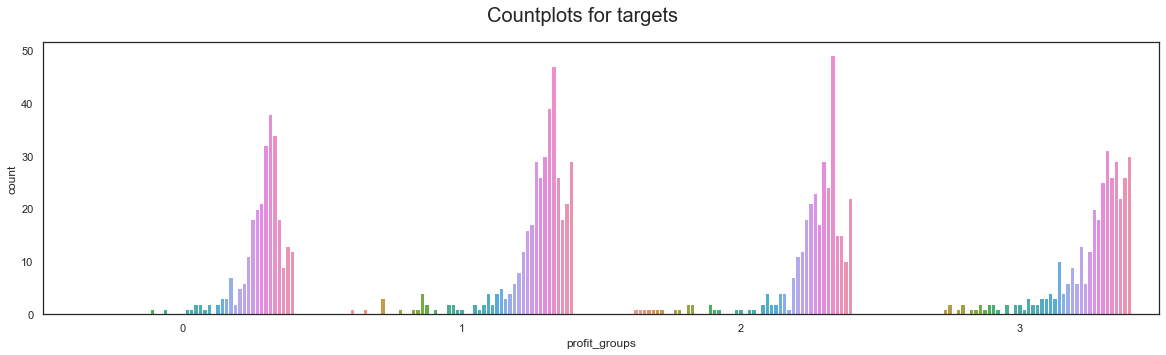

In [57]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
sns.countplot(x=dataset["profit_groups"], hue=dataset["release_year"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
ax.legend_.remove()

we can see that there are minor difference across years (pink is most recent, with blue and orange in the past), movies created recently seems to have higher ratings, this could be due to better visual effects etc, however we should not consider this as training feature because popularity levels are derived from comparison of movies of same timeframe, hence it is more likely that as years goes ratings are higher due to other factors

hence we need to take care of this using time series kfold later on

### Extracting month in datetime and visualize

In [58]:
dataset["release_month"] = dataset["release_date"].apply(lambda x : x.month)

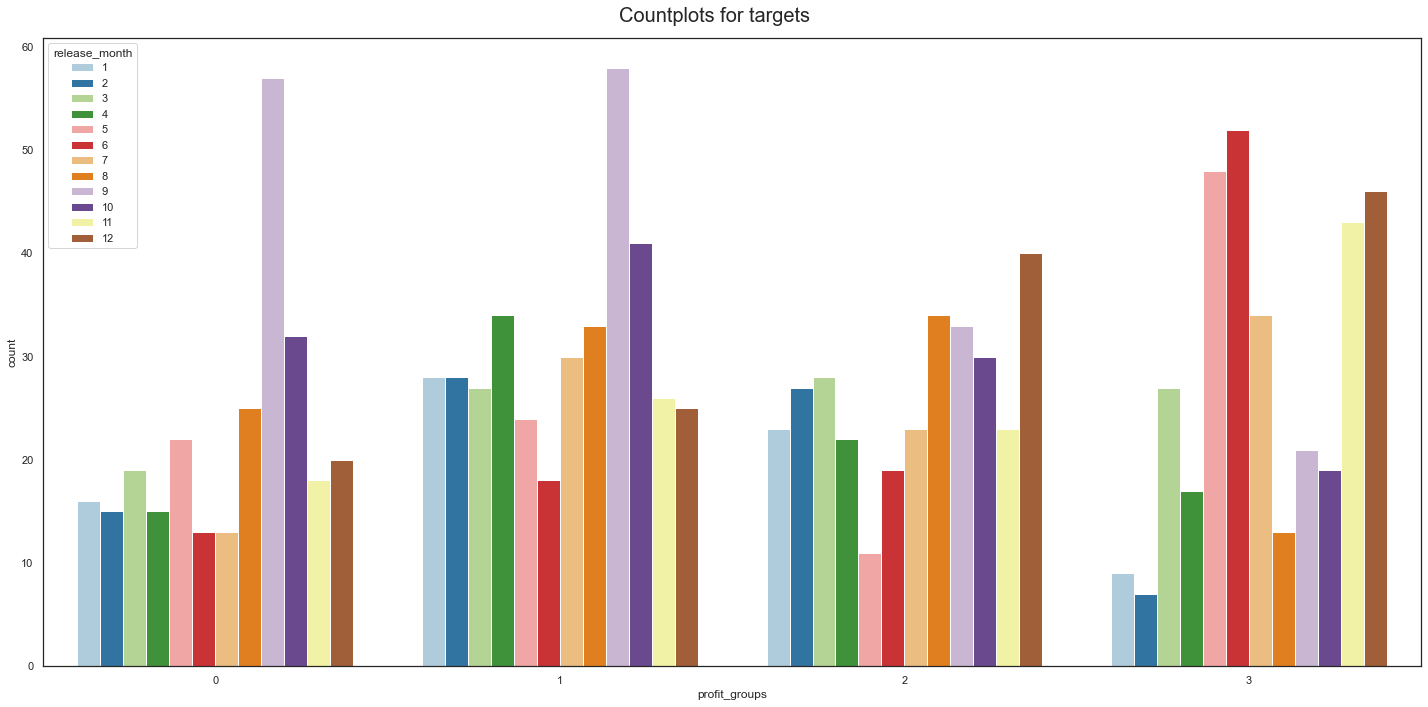

In [59]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
sns.countplot(x=dataset["profit_groups"], hue=dataset["release_month"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

we see some months have abnomally low /medium ratings such as september and december, while some have higher ratings such as may, this may be due to many unknown but chronic factors hence this could be use as a training feature

In [60]:
training_features.append("release_month")

### Handling categorical features and feature extraction

Before we conduct feature extraction, we will need to split the dataset into train and test set so as not to cause information leakage, which will cause us to obtain a better than actual performance

In [61]:
from sklearn.model_selection import train_test_split

dataset_train, dataset_test = train_test_split(dataset, test_size=0.15, random_state=42)
dataset_orig = dataset.copy()
dataset = dataset_train.copy()

In [62]:
dataset = dataset.reset_index(drop = True)
dataset = dataset.reset_index()

In [63]:
dataset

index  Unnamed: 0      id    imdb_id  popularity       budget  \
0         0          78  296100  tt3530002    2.096273   25000000.0   
1         1        9598     708  tt0093428    1.511663   40000000.0   
2         2        5037    4464  tt0329575    0.620070   87000000.0   
3         3         650  244786  tt2582802    4.780419    3300000.0   
4         4        3392   58574  tt1515091    2.579776  125000000.0   
...     ...         ...     ...        ...         ...          ...   
1088   1088        6986   36648  tt0359013    1.792138   65000000.0   
1089   1089        7412   13885  tt0408236    1.846602   50000000.0   
1090   1090        7482    5857  tt0897361    0.811539   12000000.0   
1091   1091        5442   47964  tt1606378    2.815499   92000000.0   
1092   1092        7469   13680  tt0492956    0.911592   22000000.0   

          revenue                                  original_title  \
0      52395996.0                                The Night Before   
1     191185897.0                            The Living Daylights   
2     148336445.0                                      Seabiscuit   
3      13993093.0                                        Whiplash   
4     334615000.0              Sherlock Holmes: A Game of Shadows   
...           ...                                             ...   
1088  128905366.0                                  Blade: Trinity   
1089  152000000.0  Sweeney Todd: The Demon Barber of Fleet Street   
1090    9620399.0                            I Know Who Killed Me   
1091  304654182.0                          A Good Day to Die Hard   
1092  147880543.0                                   The Game Plan   

                                                   cast  \
0     Joseph Gordon-Levitt|Seth Rogen|Anthony Mackie...   
1     Timothy Dalton|Maryam d'Abo|Jeroen KrabbÃ©|Joe...   
2     Jeff Bridges|David McCullough|Chris Cooper|Tob...   
3     Miles Teller|J.K. Simmons|Melissa Benoist|Aust...   
4     Robert Downey Jr.|Jude Law|Jared Harris|Noomi ...   
...                                                 ...   
1088  Wesley Snipes|Kris Kristofferson|Dominic Purce...   
1089  Johnny Depp|Helena Bonham Carter|Alan Rickman|...   
1090  Lindsay Lohan|Julia Ormond|Neal McDonough|Bria...   
1091  Bruce Willis|Jai Courtney|Sebastian Koch|Mary ...   
1092  Dwayne Johnson|Madison Pettis|Kyra Sedgwick|Ro...   

                                               homepage         director  \
0             https://www.facebook.com/NightBeforeMovie  Jonathan Levine   
1     http://www.mgm.com/view/movie/1132/The-Living-...        John Glen   
2                       http://www.seabiscuitmovie.com/        Gary Ross   
3                     http://sonyclassics.com/whiplash/  Damien Chazelle   
4      http://sherlockholmes2.warnerbros.com/index.html      Guy Ritchie   
...                                                 ...              ...   
1088            http://www.warnerbros.com/blade-trinity   David S. Goyer   
1089                   http://www.sweeneytoddmovie.com/       Tim Burton   
1090  http://sonypictures.com/homevideo/iknowwhokill...  Chris Sivertson   
1091                       http://www.diehardmovie.com/       John Moore   
1092             http://movies.disney.com/the-game-plan     Andy Fickman   

                                                tagline  \
0     Their past, present and future. All in one night.   
1                                   Licensed to thrill.   
2            The hopes of a nation rode on a long shot.   
3       The road to greatness can take you to the edge.   
4                                    The Game is Afoot.   
...                                                 ...   
1088                             The final hunt begins.   
1089                       Never Forget. Never Forgive.   
1090                There are two sides to every crime.   
1091                        Yippee Ki-Yay Mother Russia   
1092  Half his size, twice the trouble ... and she's.

In [64]:
dataset[cat_cols].head(1)

imdb_id    original_title  \
0  tt3530002  The Night Before   

                                                cast  \
0  Joseph Gordon-Levitt|Seth Rogen|Anthony Mackie...   

                                    homepage         director  \
0  https://www.facebook.com/NightBeforeMovie  Jonathan Levine   

                                             tagline  \
0  Their past, present and future. All in one night.   

                                            keywords  \
0  male friendship|new york city|drug|christmas e...   

                                            overview  genres  \
0  In New York City for their annual tradition of...  Comedy   

                              production_companies release_date  \
0  Sony Pictures|Point Grey Pictures|Good Universe   2015-11-20   

  popularity_level  
0  Moderately High

In [65]:
dataset.iloc[0]["overview"]

'In New York City for their annual tradition of Christmas Eve debauchery, three lifelong best friends set out to find the Holy Grail of Christmas parties since their yearly reunion might be coming to an end.'

from the above, we can see that we need to do some feature extraction from the columns to generate meaningful categories

- length of title - The length of a movie title may influence how audiences perceive the film. A shorter, catchy title might be more memorable and easier to recall, potentially leading to increased interest and viewership. On the other hand, a longer title might convey more information about the movie's content or theme, which could attract specific audiences but might also be seen as less accessible to others.

- length of tagline - Short and catchy taglines are often more memorable and impactful. They can succinctly capture the essence of the movie and leave a lasting impression on audiences. A well-crafted short tagline might generate curiosity and interest, potentially leading to higher ratings as viewers are intrigued to watch the film. The length of a tagline can affect its ability to communicate the movie's theme or premise effectively. A concise tagline can quickly convey the central idea or emotion of the film, making it easier for audiences to understand what to expect. However, if a tagline is too short or cryptic, it might fail to provide enough information, leading to confusion or misinterpretation.

- length of overview - A succinct overview that effectively summarizes the movie's plot, themes, and key elements can enhance audience understanding and engagement. If the overview is too lengthy or convoluted, it may fail to communicate the movie's core aspects clearly, potentially leading to confusion and dissatisfaction among viewers. The length of the overview can influence audience expectations regarding the movie's content and quality. A well-written and comprehensive overview can provide insight into what viewers can expect from the film, helping to manage expectations and increase the likelihood of a positive reception. Conversely, a brief or vague overview may not adequately convey the movie's appeal, leading to disappointment and lower ratings.

In [66]:
def getlength(x):
    words = x.split()
    return len(words)

In [67]:
dataset["title length"] = dataset["original_title"].apply(lambda x: getlength(x))
dataset["tagline length"] = dataset["tagline"].apply(lambda x: getlength(x))
dataset["overview length"] = dataset["overview"].apply(lambda x: getlength(x))

In [68]:
colA= ["title length","tagline length","overview length"] 

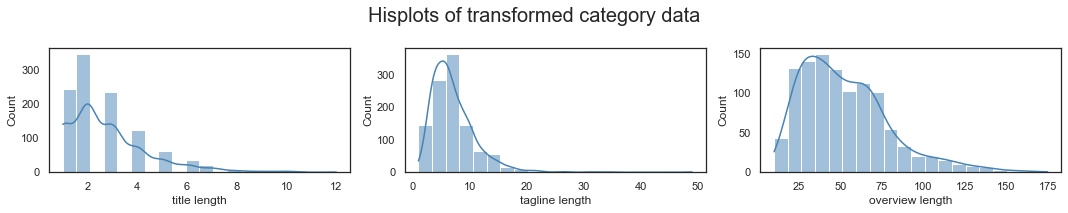

In [69]:
sns.set_palette('Paired')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
for i, ax in enumerate(axes.flat):
    sns.histplot(x=colA[i],data = dataset, bins = 20, kde = True, ax=ax, color= 'steelblue')
fig.suptitle('Hisplots of transformed category data', fontsize=20)
plt.tight_layout()

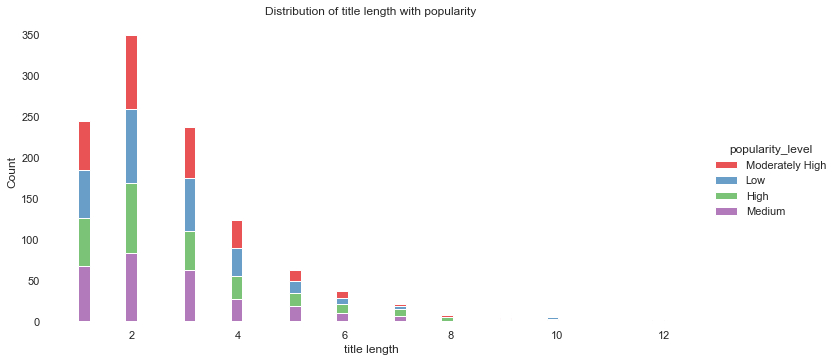

In [70]:
sns.displot(data=dataset, kind='hist', x='title length', hue='popularity_level', bins=50,
            multiple='stack', height=5, aspect=2, palette='Set1')
sns.despine(left=True, bottom=True)
plt.title('Distribution of title length with popularity');

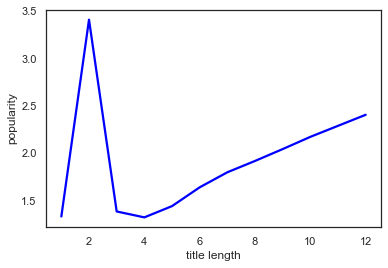

In [71]:
sns.regplot(data=dataset, x='title length', y="popularity", lowess=True, scatter=False, color='blue')
plt.show()

title length not useful

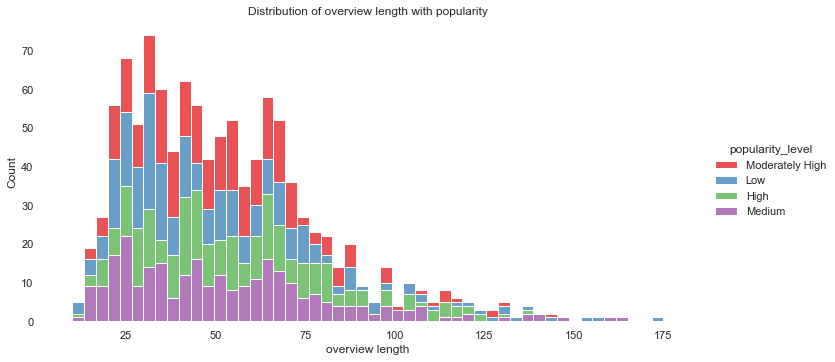

In [72]:
sns.displot(data=dataset, kind='hist', x='overview length', hue='popularity_level', bins=50,
            multiple='stack', height=5, aspect=2, palette='Set1')
sns.despine(left=True, bottom=True)
plt.title('Distribution of overview length with popularity');

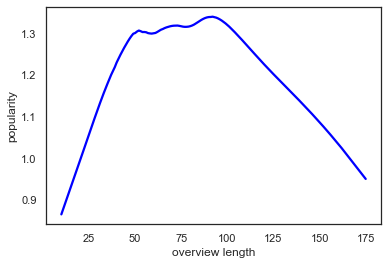

In [73]:
sns.regplot(data=dataset, x='overview length', y="popularity", lowess=True, scatter=False, color='blue')
plt.show()

overview length might be useful, too short overview might not give audience enough information to capture their interest, while too long overview length may be boring and cause audiences to lose interest.

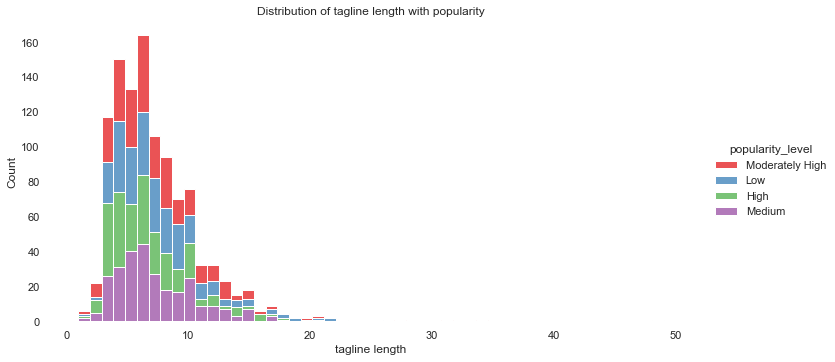

In [74]:
sns.displot(data=dataset, kind='hist', x='tagline length', hue='popularity_level', bins=50,
            multiple='stack', height=5, aspect=2, palette='Set1')
sns.despine(left=True, bottom=True)
plt.title('Distribution of tagline length with popularity');

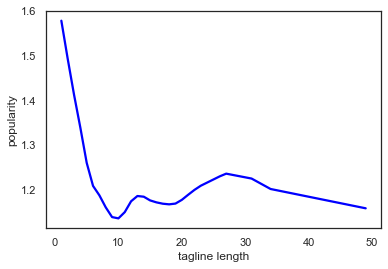

In [75]:
sns.regplot(data=dataset, x='tagline length', y="popularity", lowess=True, scatter=False, color='blue')
plt.show()

tagline length is very useful, one reason is that short tagline is more catchy and memorizable and impressionable

In [76]:
#training_features.append("title length")
training_features.append("tagline length")
training_features.append("overview length")

In [77]:
training_features

['budget_adj',
 'runtime',
 'vote_count',
 'vote_average',
 'popularity',
 'popularity_level',
 'release_month',
 'tagline length',
 'overview length']

### One hot encoding important category features

In [78]:
def onehotencode(dataset,col):
    df = pd.DataFrame()
    df[col] = dataset[col].str.split('|')
    one_hot_encoded = pd.get_dummies(df[col].apply(pd.Series).stack()).sum(level=0)
    return one_hot_encoded

In [79]:
OHE_cast = onehotencode(dataset,"cast")

lets take a look at the movies Chris Pratt acted in

In [80]:
dataset.iloc[OHE_cast.loc[OHE_cast["Chris Pratt"] != 0].index]

index  Unnamed: 0      id    imdb_id  popularity       budget  \
235    235        3448   63492  tt0770703    1.120851   20000000.0   
236    236        3457   60308  tt1210166    1.081676   50000000.0   
243    243        1454   10521  tt0901476    1.074072   30000000.0   
381    381         630  118340  tt2015381   14.311205  170000000.0   
470    470        4446   72207  tt1195478    1.095479   30000000.0   
477    477           0  135397  tt0369610   32.985763  150000000.0   

          revenue            original_title  \
235  3.042610e+07       What's Your Number?   
236  1.102062e+08                 Moneyball   
243  1.146635e+08                Bride Wars   
381  7.733124e+08   Guardians of the Galaxy   
470  5.390975e+07  The Five-Year Engagement   
477  1.513529e+09            Jurassic World   

                                                  cast  \
235  Chris Evans|Anna Faris|Martin Freeman|Chris Pr...   
236  Brad Pitt|Jonah Hill|Robin Wright|Philip Seymo...   
243  Anne Hathaway|Kate Hudson|Bryan Greenberg|Chri...   
381  Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...   
470  Emily Blunt|Alison Brie|Jason Segel|Rhys Ifans...   
477  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   

                                       homepage          director  \
235        http://www.whatsyournumbermovie.com/        Mark Mylod   
236             http://www.moneyball-movie.com/    Bennett Miller   
243                    http://www.bridewars.com       Gary Winick   
381                 http://marvel.com/guardians        James Gunn   
470  http://www.thefiveyearengagementmovie.com/  Nicholas Stoller   
477               http://www.jurassicworld.com/   Colin Trevorrow   

                                               tagline  \
235        Ally's looking for the best ex of her life.   
236                         What are you really worth?   
243                             May the best bride win   
381                        All heroes start somewhere.   
470  A comedy about the journey between popping the...   
477                                  The park is open.   

                                              keywords  \
235    based on novel|loser|magazine|womanizer|mission   
236  underdog|based on novel|baseball|teamwork|partner   
243        bride|friendship|engagement|rivalry|wedding   
381  marvel comic|spaceship|space|scene during end ...   
470     sex|san francisco|restaurant|frustration|chase   
477  monster|dna|tyrannosaurus rex|velociraptor|island   

                                              overview  runtime  \
235  Ally Darling (Anna Faris) is realizing she's a...      106   
236  The story of Oakland Athletics general manager...      133   
243  Two best friends become rivals when their resp...       89   
381  Light years from Earth, 26 years after being a...      121   
470  Exactly one year after Tom meets Violet, he su...      124   
477  Twenty-two years after the events of Jurassic ...      124   

                                        genres  \
235                             Comedy|Romance   
236                                      Drama   
243                                     Comedy   
381           Action|Science Fiction|Adventure   
470                                     Comedy   
477  Action|Adventure|Science Fiction|Thriller   

                                  production_companies release_date  \
235  Regency Enterprises|Contrafilm|New Regency Pic...   2011-09-30   
236          Columbia Pictures|Scott Rudin Productions   2011-09-22   
243  Dune Entertainment|Regency Enterprises|Fox 200...   2009-01-09   
381  Marvel Studios|Moving Picture Company (MPC)|Bu...   2014-07-30   
470  Universal Pictures|Dentsu|Relativity Media|Apa...   2012-04-27   
477  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   

     vote_count  vote_average  release_year    budget_adj   revenue_adj  \
235         390           6.2          2011  1.938796e+07  2.949500e+07   
236       

In [81]:
OHE_cast.shape

(1093, 2708)

For categories such as casts, directors, keywords, genre, and production companies, we One-hot-encode (OHE) them to usable features. However, these OHE features are very sparse and have extremely high dimensions (>2000), exceeding the number of entries (1286).  This means that no prediction model will work well as a model trained on these features will be high in complexity and have very large hypothesis space which will require dataset with many more entries to prevent overfitting. Hence, we aim to reduce the hypothesis space by dimensionality reduction. 
- PCA
- SelectKBest

### Dimension reduction - PCA

In [82]:
# Perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=OHE_cast.shape[0])  # Specify the number of components you want to reduce to
pca_result = pca.fit_transform(OHE_cast)

# Create DataFrame to store PCA results
pca_df = pd.DataFrame(data=pca_result)

In [83]:
pca_df["popularity_level"] = dataset["popularity_level"]

Text(0.5, 1.0, 'Explained Variance')

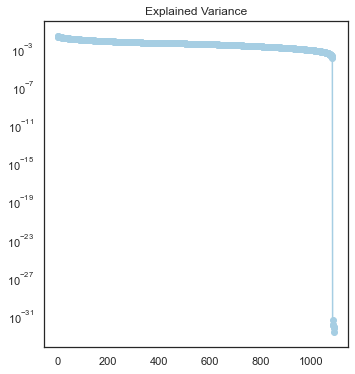

In [84]:
fig, ax= plt.subplots(figsize=(12, 6))

plt.subplot(121)
plt.semilogy(pca.explained_variance_, '-o')
# plt.axvline(x=1020, c='r', ls='--', label=r'$j=17$')
plt.title('Explained Variance')
# plt.xlim(0, 10)
# plt.ylim( 10 ** -4,  1)
# plt.legend()

notice that the explained variance do not drop at first few principal components, this indicates PCA is not ideal in this context, nevertheless we try to visualize PCA results

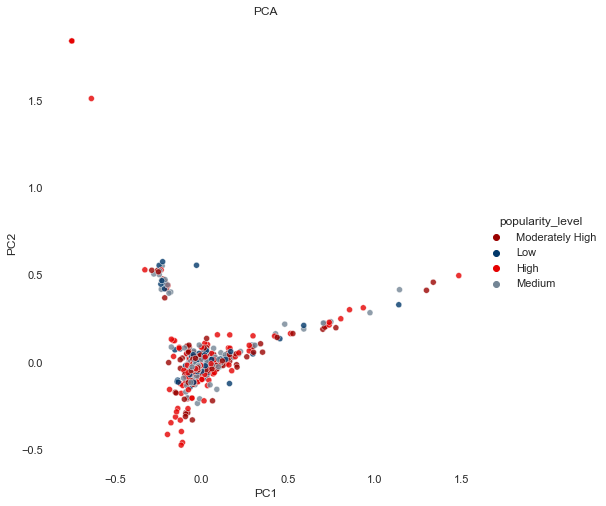

In [296]:
sns.relplot(x=pca_df[0], y=pca_df[1], hue=pca_df["popularity_level"], kind='scatter', height=7, alpha=0.8, 
           palette={'Low':sns.xkcd_rgb['marine blue'],
                    'Medium':sns.xkcd_rgb['steel'],
                    "Moderately High" : sns.xkcd_rgb['deep red'],
                    "High" : sns.xkcd_rgb["red"]
                   }
           )
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.box(False);

### Dimension reduction - SelectKbest

Based on the general 98-2 rule, where 2% of actors make 98% of profits or vice-versa, we select top/bottom 2% actors which is around 100.

We choose popularity instead of profit as the metric for selectKbest because based on our prior knowledge, there is a more direct link between actors and movie’s popularity instead of movie’s profit. 

In [86]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression

# Perform feature selection using SelectKBest with chi-squared test
k = 100 # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
selected_features = selector.fit_transform(OHE_cast, dataset["popularity_level"]) 

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_cast = OHE_cast.columns[selected_indices]
selected_cast = selected_cast.tolist()

In [87]:
selected_cast

['Alec Baldwin',
 'Alfred Molina',
 'Alicia Vikander',
 'Andy Serkis',
 'Angela Bassett',
 'Arnold Schwarzenegger',
 'Ben Foster',
 'Ben Stiller',
 'Brooke Shields',
 'Cameron Diaz',
 'Carrie Fisher',
 'Chris Hemsworth',
 'Chris Pratt',
 'Christopher Lloyd',
 'Daniel Craig',
 'Daniel Radcliffe',
 'David Wenham',
 'Denis Leary',
 'Emma Watson',
 'Graham McTavish',
 'Hank Azaria',
 'Harrison Ford',
 'Helena Bonham Carter',
 'Hugo Weaving',
 'Ian McKellen',
 'Irrfan Khan',
 'Jack Davenport',
 'James Gandolfini',
 'James Woods',
 'Jason Segel',
 'Jason Sudeikis',
 'Jay Baruchel',
 'Jeff Goldblum',
 'Jesse Eisenberg',
 'John Cleese',
 'Johnny Depp',
 'Jordana Brewster',
 'Joseph Gordon-Levitt',
 'Josh Duhamel',
 'Julia Roberts',
 'Kate Beckinsale',
 'Kathy Bates',
 'Katie Featherston',
 'Ken Stott',
 'Larry the Cable Guy',
 'Lea Thompson',
 'Leonardo DiCaprio',
 'Liam Hemsworth',
 'Lily Collins',
 'Lucy Liu',
 'Luke Bracey',
 'Maggie Smith',
 'Mark Hamill',
 'Martin Freeman',
 'Martin Sheen

observing the selected top 50 cast, we can easily observe that they are all names of recognizable famous actors, lets count the movies they acted in


In [88]:
def countmovies(x, df):
    count = df.loc[df[x] != 0][x].count()
    return count

In [89]:
df_cast = pd.DataFrame(selected_cast, columns= ["cast"])
df_cast["number of movies"] = df_cast["cast"].apply(lambda x: countmovies(x,OHE_cast))
df_cast = df_cast.sort_values(by = "number of movies", ascending = False)

In [90]:
df_cast

cast  number of movies
92      Tom Hanks                14
75  Russell Crowe                14
91     Tom Cruise                12
35    Johnny Depp                12
81     Seth Rogen                12
..            ...               ...
87  Taron Egerton                 2
41    Kathy Bates                 2
49       Lucy Liu                 2
43      Ken Stott                 2
50    Luke Bracey                 2

[100 rows x 2 columns]

In [91]:
def getpopcast(x, indexlist):
    if x in indexlist:
        return 1
    else:
        return 0

In [92]:
mlist = []
for cast in df_cast['cast'].tolist():
    index = OHE_cast.loc[OHE_cast[cast] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["bigimpact cast"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

In [96]:
dataset = dataset.sort_values(by = "popularity")

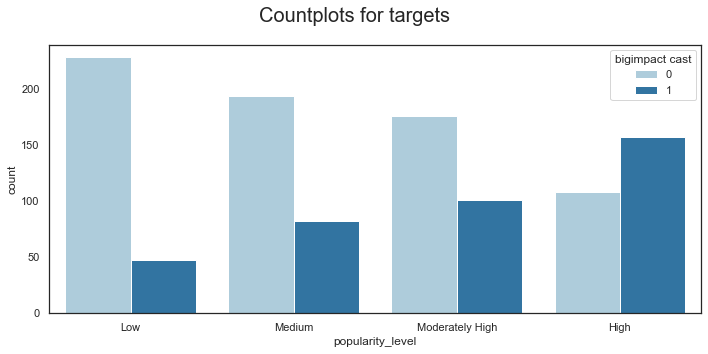

In [97]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["bigimpact cast"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

the significance of these top 100 actors are that they either acted in very good movies or very bad movies

- because kbest also select bad actors, we need to account for this

In [98]:
badcast = []
for casts in dataset.loc[(dataset["bigimpact cast"] != 0)&(dataset["popularity_level"] == "Low")]["cast"].values:
    casts = casts.split("|")
    badcast.append(casts)
badcast = [item for sublist in badcast for item in sublist]
badcast = set(badcast)

badcast2 = {}
for cast in df_cast['cast'].tolist():
    if cast in badcast:
        index = OHE_cast.loc[OHE_cast[cast] != 0 ].index.tolist()
        badcast2[cast] = dataset.iloc[index]["popularity"].mean()

In [99]:
badcast2

{'Seth Rogen': 1.2773295,
 'Joseph Gordon-Levitt': 1.2204903636363638,
 'Scarlett Johansson': 2.554743818181818,
 'Cameron Diaz': 1.3604761,
 'Paul Giamatti': 1.3128430999999998,
 'Julia Roberts': 1.1832594999999997,
 'Natalie Portman': 1.353644111111111,
 'Leonardo DiCaprio': 0.8861495555555554,
 'Alec Baldwin': 2.998090375,
 'Emma Watson': 1.7202079999999997,
 'Daniel Radcliffe': 1.265893625,
 'Neil Patrick Harris': 1.26759057142857,
 'Maggie Smith': 1.4637428571428572,
 'Sean Penn': 2.0527602857142844,
 'Jesse Eisenberg': 1.2327291666666649,
 'Tommy Lee Jones': 0.9301038333333334,
 'Ben Foster': 1.5355835000000002,
 'Alfred Molina': 2.2748939999999997,
 'Paul Walker': 1.4227848,
 'Angela Bassett': 1.9839935,
 "Vincent D'Onofrio": 1.50830775,
 'Christopher Lloyd': 0.67815625,
 'Brooke Shields': 1.7725573333333333,
 'Spencer Breslin': 3.0377003333333334,
 'Sara Paxton': 1.4704050000000002,
 'Sheri Moon Zombie': 2.449893666666666,
 'Paul Schneider': 1.9625496666666666,
 'Jordana Brewst

as we can see, some popular cast are in the bad cast candidates, we need to remove them. we keep cast with average popularity of less than dataset's average in bad cast list

In [100]:
final_badcast = []
final_goodcast = []
for i,v in badcast2.items():
    if v < dataset["popularity"].mean():
        final_badcast.append(i)
    else:
        final_goodcast.append(i)

In [101]:
mlist = []
for cast in final_badcast:
    index = OHE_cast.loc[OHE_cast[cast] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["bad cast"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

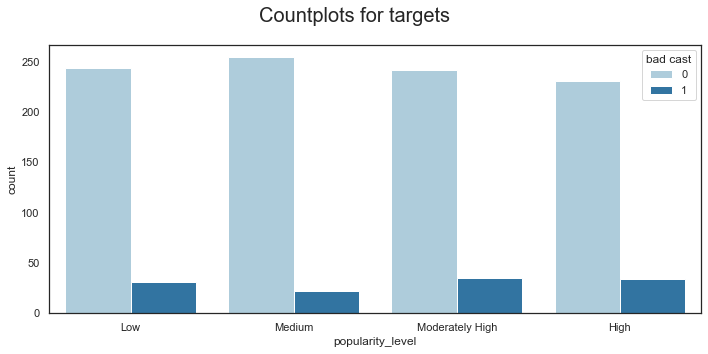

In [102]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["bad cast"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

from the above, we observe that bad cast is not a useful feature, this may be because having bad cast does not mean movie cannot be positively impacted by good cast as seen in the moderately high popularity movies having more bad cast than low popularity movies, furthermore bad cast account for low percentage of Low ratings

### Dimension reduction - based on prior knowledge to get good cast

based on prior knowledge, we know that actors that acted in more movies are likely more popular and movies tend to have better ratings, so we are also interested actors that acted in many movies, we set the threshold at top 10 actors

In [103]:
all_cast = OHE_cast.columns.tolist()
df_allcast = pd.DataFrame(all_cast, columns= ["cast"])
df_allcast["number of movies"] = df_allcast["cast"].apply(lambda x: countmovies(x,OHE_cast))
df_allcast = df_allcast.sort_values(by = "number of movies", ascending = False)

In [104]:
df_allcast.head(100)

cast  number of movies
1761       Matt Damon                18
1731    Mark Wahlberg                16
2239    Russell Crowe                14
2547        Tom Hanks                14
180     Anne Hathaway                14
...               ...               ...
2448   Susan Sarandon                 8
1381  Josh Hutcherson                 8
2075   Pierce Brosnan                 7
1124     James McAvoy                 7
1642     Logan Lerman                 7

[100 rows x 2 columns]

we will cut off at 7 movies (around top 2% quantile)

In [105]:
for cast in df_allcast.head(100)["cast"]:
    if df_allcast.loc[df_allcast["cast"] == cast]["number of movies"].values[0] >7:
        final_goodcast.append(cast)
final_goodcast = list(set(final_goodcast))
final_goodcast

['Ewan McGregor',
 'Channing Tatum',
 'Jeff Bridges',
 'Elizabeth Banks',
 'Robert Downey Jr.',
 'Brad Pitt',
 'Ian McKellen',
 'Michelle Rodriguez',
 'Terrence Howard',
 'Clive Owen',
 'Paul Giamatti',
 'Russell Crowe',
 'Sandra Bullock',
 'John Goodman',
 'Alec Baldwin',
 'Paul Schneider',
 'Kristen Wiig',
 'Bill Murray',
 'Mark Strong',
 'Paul Rudd',
 'Johnny Depp',
 'Bradley Cooper',
 'Josh Hutcherson',
 'Jennifer Lawrence',
 'Angelina Jolie',
 'George Clooney',
 'Guy Pearce',
 'Natalie Portman',
 'Jennifer Aniston',
 'Jason Bateman',
 'Alfred Molina',
 'Scarlett Johansson',
 'Susan Sarandon',
 'Mark Wahlberg',
 'Christian Bale',
 'Ben Affleck',
 'Nicolas Cage',
 'Hugh Jackman',
 'Steve Carell',
 'James Franco',
 'Spencer Breslin',
 'Emma Watson',
 'Steve Buscemi',
 'Tom Cruise',
 'Sylvester Stallone',
 'Ralph Fiennes',
 'Rachel Weisz',
 'Dennis Quaid',
 'Michael Caine',
 'Sheri Moon Zombie',
 'Julia Roberts',
 'Shia LaBeouf',
 'Philip Seymour Hoffman',
 'Leonardo DiCaprio',
 'Jose

In [106]:
OHE_cast[final_goodcast]

Ewan McGregor  Channing Tatum  Jeff Bridges  Elizabeth Banks  \
0                 0               0             0                0   
1                 0               0             0                0   
2                 0               0             1                1   
3                 0               0             0                0   
4                 0               0             0                0   
...             ...             ...           ...              ...   
1088              0               0             0                0   
1089              0               0             0                0   
1090              0               0             0                0   
1091              0               0             0                0   
1092              0               0             0                0   

      Robert Downey Jr.  Brad Pitt  Ian McKellen  Michelle Rodriguez  \
0                     0          0             0                   0   
1                     0          0             0                   0   
2                     0          0             0                   0   
3                     0          0             0                   0   
4                     1          0             0                   0   
...                 ...        ...           ...                 ...   
1088                  0          0             0                   0   
1089                  0          0             0                   0   
1090                  0          0             0                   0   
1091                  0          0             0                   0   
1092                  0          0             0                   0   

      Terrence Howard  Clive Owen  Paul Giamatti  Russell Crowe  \
0                   0           0              0              0   
1                   0           0              0              0   
2                   0           0              0              0   
3                   0           0              0              0   
4                   0           0              0              0   
...               ...         ...            ...            ...   
1088                0           0              0              0   
1089                0           0              0              0   
1090                0           0              0              0   
1091                0           0              0              0   
1092                0           0              0              0   

      Sandra Bullock  John Goodman  Alec Baldwin  Paul Schneider  \
0                  0             0             0               0   
1                  0             0             0               0   
2                  0             0             0               0   
3                  0             0             0               0   
4                  0             0             0               0   
...              ...           ...           ...             ...   
1088               0             0             0               0   
1089               0             0             0               0   
1090               0             0             0               0   
1091               0             0             0               0   
1092               0             0             0               0   

      Kristen Wiig  Bill Murray  Mark Strong  Paul Rudd  Johnny Depp  \
0                0            0            0          0            0   
1                0            0            0          0            0   
2                0            0            0          0            0   
3                0            0            0          0            0   
4                0            0            0          0            0   
...            ...          ...          ...        ...          ...   
1088             0            0            0          0            0   
1089             0            0            0          0            1   
1090             0            

the reduced feature still has extremely high dimensions and sparse, hence we will need to transform it, we will categorize all movies with the actors present as 1 and without as 0

In [107]:
mlist = []
for cast in final_goodcast:
    index = OHE_cast.loc[OHE_cast[cast] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["popular cast"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

In [108]:
dataset = dataset.sort_values(by="popularity", ascending = False)

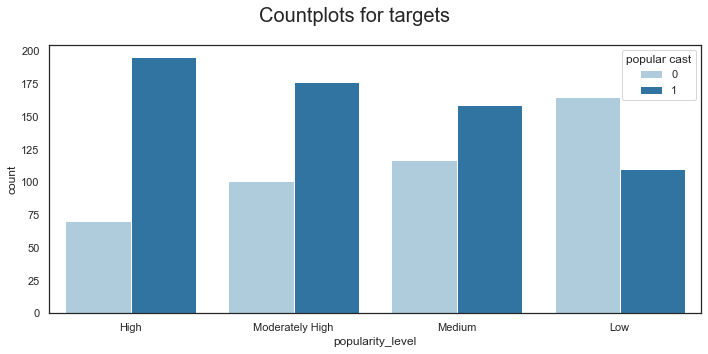

In [109]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["popular cast"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

the above plot show that we have successfully extracted a usable feature from cast

next we create a feature to calculate how many good cast in a single movie

In [110]:
def calculategoodcast(x, final_goodcast):
    i = 0
    for goodcast in final_goodcast:
        if goodcast in x:
            i+=1
    return i

In [111]:
dataset["num_goodcast"] = dataset["cast"].apply(lambda x : calculategoodcast(x, final_goodcast))

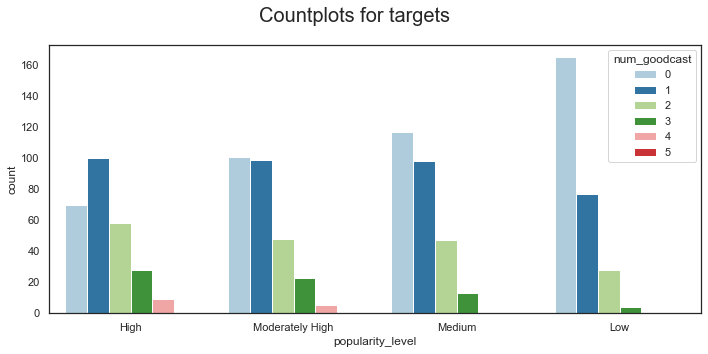

In [112]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["num_goodcast"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

we can see that num_goodcast is indeed very informative

In [113]:
training_features.append("num_goodcast")
training_features = set(training_features)
training_features = [item for item in set(training_features)]

In [114]:
#num: [budget, revenue, runtime, vote_count, tagline length, overview length, num_goodcast]
#cat: [release month]
#important list: final_goodcast
training_features

['vote_count',
 'tagline length',
 'num_goodcast',
 'budget_adj',
 'release_month',
 'overview length',
 'vote_average',
 'popularity',
 'runtime',
 'popularity_level']

### feature extraction from "director"

#### one hot encode

In [115]:
OHE_director = onehotencode(dataset,"director")

In [116]:
OHE_director.shape

(1093, 757)

In [117]:
OHE_director

Aaron Seltzer  Abe Sylvia  Adam McKay  Adam Shankman  Akiva Goldsman  \
477              0           0           0              0               0   
933              0           0           0              0               0   
672              0           0           0              0               0   
381              0           0           0              0               0   
268              0           0           0              0               0   
..             ...         ...         ...            ...             ...   
131              0           0           0              0               0   
327              0           0           0              0               0   
24               0           0           0              0               0   
598              0           0           0              0               0   
275              0           0           0              0               0   

     Alan Parker  Alan Taylor  Alastair Fothergill  Alejandro Agresti  \
477            0            0                    0                  0   
933            0            0                    0                  0   
672            0            0                    0                  0   
381            0            0                    0                  0   
268            0            0                    0                  0   
..           ...          ...                  ...                ...   
131            0            0                    0                  0   
327            0            0                    0                  0   
24             0            0                    0                  0   
598            0            0                    0                  0   
275            0            0                    0                  0   

     Alejandro AmenÃ¡bar  Alejandro GonzÃ¡lez IÃ±Ã¡rritu  Aleksander Bach  \
477                    0                               0                0   
933                    0                               0                0   
672                    0                               0                0   
381                    0                               0                0   
268                    0                               0                0   
..                   ...                             ...              ...   
131                    0                               0                0   
327                    0                               0                0   
24                     0                               0                0   
598                    0                               0                0   
275                    0                               0                0   

     Alex Garland  Alex Gibney  Alex Kendrick  Alex Proyas  Alexander Payne  \
477             0            0              0            0                0   
933             0            0              0            0                0   
672             0            0              0            0                0   
381             0            0              0            0                0   
268             0            0              0            0                0   
..            ...          ...            ...          ...              ...   
131             0            0              0            0                0   
327             0            0              0            0                0   
24              0            0              0            0                0   
598             0            0              0            0                0   
275             0            0              0            0                0   

     Alexandre Aja  Alfonso CuarÃ³n  Alister Grierson  Allen Hughes  \
477              0                0                 0             0   
933              0                0                 0             0   
672              0                0                 0             0   
381              0                0          

#### SelectKbest

In [118]:
# Perform feature selection using SelectKBest with chi-squared test
k = 200 # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
selected_features = selector.fit_transform(OHE_director, dataset["popularity_level"]) 

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_director = OHE_director.columns[selected_indices]
selected_director = selected_director.tolist()

In [119]:
mlist = []
for director in selected_director:
    index = OHE_director.loc[OHE_director[director] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["bigimpact director"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

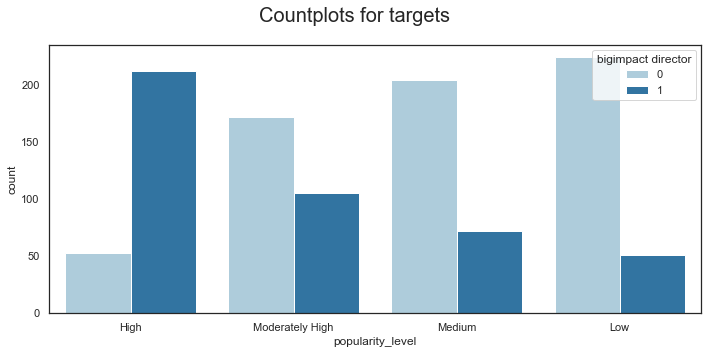

In [120]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["bigimpact director"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

#### separate good and bad from Kbest

In [121]:
baddirector = []
for director in dataset.loc[(dataset["bigimpact director"] != 0)&(dataset["popularity_level"] == "Low")]["director"].values:
    baddirector.append(director)
baddirector = set(baddirector)

baddirector2 = {}
for director in selected_director:
    if director in baddirector:
        index = OHE_director.loc[OHE_director[director] != 0 ].index.tolist()
        baddirector2[director] = dataset.iloc[index]["popularity"].mean()

In [122]:
baddirector2

{'Alex Gibney': 0.447598,
 'Alex Kendrick': 2.1935885,
 'Brian Robbins': 0.7080075,
 'Chris Columbus': 0.6514894999999999,
 'David Cronenberg': 0.615749,
 'David Slade': 1.1979836666666666,
 'Francis Lawrence': 1.4490781666666652,
 'Greg Mottola': 0.8243556666666668,
 'James Cameron': 2.904335,
 'John Carpenter': 2.27321275,
 'Jon M. Chu': 0.7132233333333334,
 'Justin Lin': 1.48979625,
 'Kevin Macdonald': 1.7070473333333334,
 'Oren Moverman': 1.7301815,
 'Paul W.S. Anderson': 1.2768228000000001,
 'Peter Berg': 1.3383536666666664,
 'Rian Johnson': 1.1877980000000001,
 'Rob Zombie': 1.5542690000000001,
 'Ruben Fleischer': 1.5880193333333334,
 'Sean McNamara': 0.954176,
 'Tony Gilroy': 1.014611,
 'Uwe Boll': 1.2939655,
 'Will Gluck': 2.710271666666667}

In [123]:
final_baddirector = []
for i,v in baddirector2.items():
    if v < dataset["popularity"].mean():
        final_baddirector.append(i)

In [124]:
mlist = []
for director in final_baddirector:
    index = OHE_director.loc[OHE_director[director] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["bad director"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

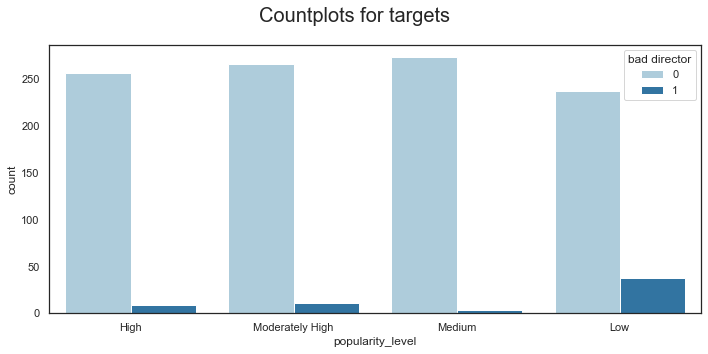

In [125]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["bad director"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

we can see that bad directors do have higher chance of making bad movies, however they consist of small percentage of the population, hence we try to set another criteria to extract out poor performing director

#### do directors with more movies make better movies?

In [126]:
all_director = OHE_director.columns.tolist()
df_alldirector = pd.DataFrame(all_director, columns= ["director"])
df_alldirector["num_movies by director"] = df_alldirector["director"].apply(lambda x: countmovies(x,OHE_director))
df_alldirector = df_alldirector.sort_values(by = "num_movies by director", ascending = False)

In [127]:
df_alldirector.head(50)

director  num_movies by director
328        John Carpenter                      12
675     Steven Soderbergh                      10
676      Steven Spielberg                       8
591       Robert Zemeckis                       8
536         Peter Jackson                       7
698            Tim Burton                       6
460           Michael Bay                       6
126        Clint Eastwood                       6
605            Ron Howard                       6
212      Francis Lawrence                       6
240        Gore Verbinski                       5
144      Darren Aronofsky                       5
151         David Fincher                       5
332             John Glen                       5
578            Rob Reiner                       5
123     Christopher Nolan                       5
523    Paul W.S. Anderson                       5
571          Ridley Scott                       5
447       Martin Scorsese                       5
337         John Lasseter                       5
407           Lee Unkrich                       4
515       Paul Greengrass                       4
754           Zack Snyder                       4
620             Sam Raimi                       4
580            Rob Zombie                       4
107        Chris Columbus                       4
532        Peter Farrelly                       4
390           Kevin Smith                       4
553     Quentin Tarantino                       4
252           Guy Ritchie                       4
209          F. Gary Gray                       4
251          Guy Hamilton                       4
100       Carlos Saldanha                       4
398        Lana Wachowski                       4
248    Guillermo del Toro                       4
31         Andrew Stanton                       4
276         James Cameron                       4
89          Brian Robbins                       4
55     Baltasar KormÃ¡kur                       4
211  Francis Ford Coppola                       4
14          Alex Kendrick                       4
414       Lilly Wachowski                       4
75              Brad Bird                       4
72         Bobby Farrelly                       4
475     Mikael HÃ¥fstrÃ¶m                       4
376            Justin Lin                       4
561          Rian Johnson                       3
289       Jason Friedberg                       3
321            Joe Wright                       3
331     John Erick Dowdle                       3

In [128]:
dataset = dataset.merge(df_alldirector, on = "director", how = "left")

In [129]:
dataset = dataset.sort_values(by = "popularity", ascending = False)

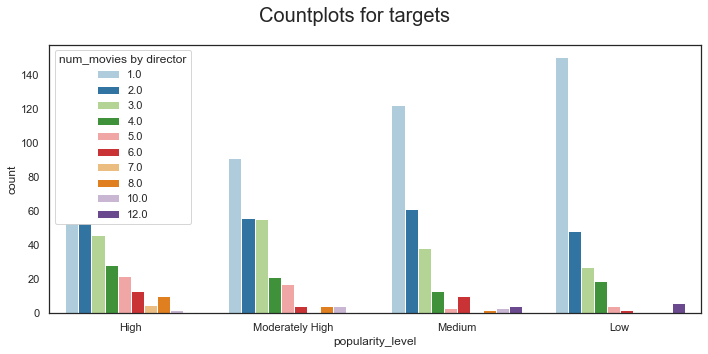

In [130]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["num_movies by director"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

from the plot, we see that inexperienced director (1 movie) do tend to make worst movies, however there are barely any trending for directors with 2 or more movies, hence we create one feature called inexperienced director

In [131]:
inexperienced_director = df_alldirector.loc[df_alldirector["num_movies by director"] == 1]["director"].tolist()

In [132]:
mlist = []
for director in inexperienced_director:
    index = OHE_director.loc[OHE_director[director] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["inexperienced_director"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

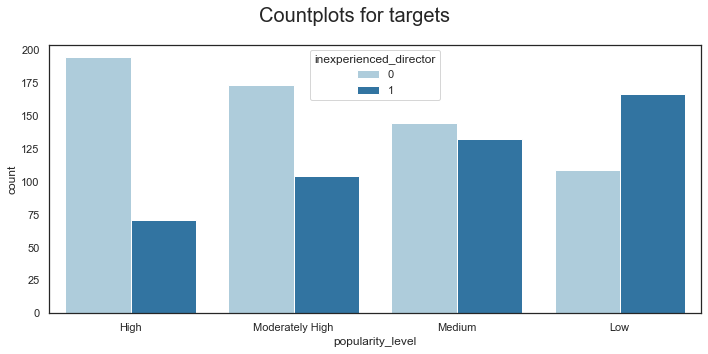

In [133]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["inexperienced_director"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

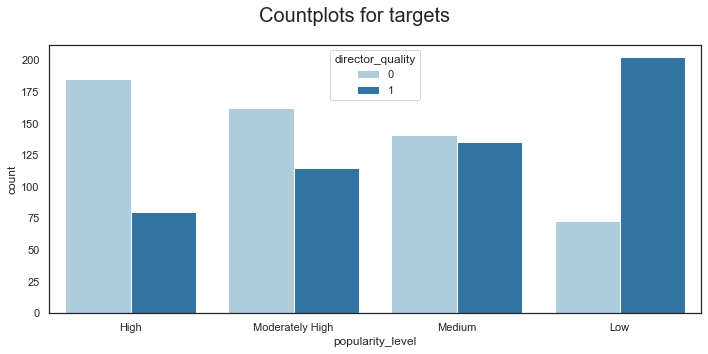

In [134]:
dataset["director_quality"] = ((dataset["inexperienced_director"] + dataset["bad director"])/2).apply(lambda x: int(x+0.5))

sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["director_quality"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

In [135]:
training_features.append("director_quality")
training_features = [item for item in set(training_features)]
#num: [budget, revenue, runtime, vote_count, vote_average, profit, tagline length, overview length, num_goodcast]
#cat: [release month, director_quality]
#important list: final_goodcast, inexperienced_director, final_baddirector

### feature extraction from production companies

#### one hot encode

In [136]:
OHE_production = onehotencode(dataset,"production_companies")

In [137]:
OHE_production.shape

(1093, 1422)

In [138]:
OHE_production

"DIA" Productions GmbH & Co. KG  10th Hole Productions  \
0                                   0                      0   
1                                   0                      0   
2                                   0                      0   
3                                   0                      0   
4                                   0                      0   
...                               ...                    ...   
1088                                0                      0   
1089                                0                      0   
1090                                0                      0   
1091                                0                      0   
1092                                0                      0   

      11:11 Mediaworks  120dB Films  1492 Pictures  \
0                    0            0              0   
1                    0            0              0   
2                    0            0              0   
3                    0            0              0   
4                    0            0              0   
...                ...          ...            ...   
1088                 0            0              0   
1089                 0            0              0   
1090                 0            0              0   
1091                 0            0              0   
1092                 0            0              0   

      1984 Private Defense Contractors  2 Bridges Productions  2 Entertain  \
0                                    0                      0            0   
1                                    0                      0            0   
2                                    0                      0            0   
3                                    0                      0            0   
4                                    0                      0            0   
...                                ...                    ...          ...   
1088                                 0                      0            0   
1089                                 0                      0            0   
1090                                 0                      0            0   
1091                                 0                      0            0   
1092                                 0                      0            0   

      20th Century Fox  20th Century Fox Home Entertainment  \
0                    0                                    0   
1                    0                                    0   
2                    0                                    0   
3                    0                                    0   
4                    0                                    0   
...                ...                                  ...   
1088                 0                                    0   
1089                 0                                    0   
1090                 0                                    0   
1091                 0                                    0   
1092                 0                                    0   

      21 Laps Entertainment  26 Films  27 Films Production  2929 Productions  \
0                         0         0                    0                 0   
1                         0         0                    0                 0   
2                         0         0                    0                 0   
3                         0         0                    0                 0   
4                         0         0                    0                 0   
...                     ...       ...                  ...               ...   
1088                      0         0                    0                 0   
1089                      0         0                    0                 0   
1090                      1         0                    0                 0   
1091                      0         0                    0                 0   
1092          

#### SelectKbest

In [139]:
# Perform feature selection using SelectKBest with chi-squared test
k = 50 # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
selected_features = selector.fit_transform(OHE_production, dataset["popularity_level"]) 

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_production = OHE_production.columns[selected_indices]
selected_production = selected_production.tolist()

In [140]:
mlist = []
for production in selected_production:
    index = OHE_production.loc[OHE_production[production] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["bigimpact production"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

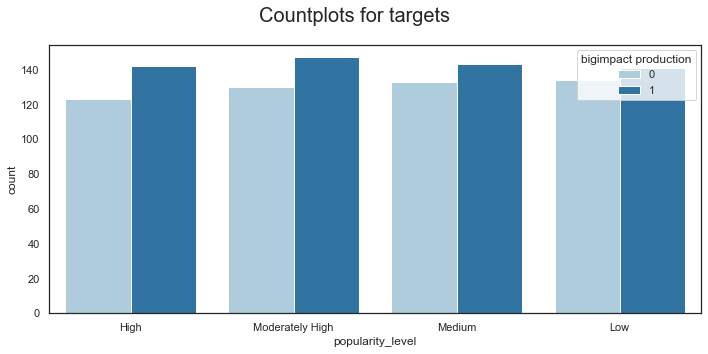

In [141]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["bigimpact production"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

looks like there are no significant bad production company, however lets add one more criteria to further source out good production company. this criteria will be based on the number of movies they produced, based on the assumption that a production company that produce more movies is likely to produce better movies.

In [142]:
all_production = OHE_production.columns.tolist()
df_allproduction = pd.DataFrame(all_production, columns= ["production"])
df_allproduction["num_movies by production"] = df_allproduction["production"].apply(lambda x: countmovies(x,OHE_production))
df_allproduction = df_allproduction.sort_values(by = "num_movies by production", ascending = False)

In [143]:
df_allproduction.head(300)

production  num_movies by production
1304            Universal Pictures                       102
1354                  Warner Bros.                       101
1044              Relativity Media                        60
268              Columbia Pictures                        59
945             Paramount Pictures                        56
...                            ...                       ...
1147   Sony Pictures Entertainment                         2
1187                     Studio 37                         2
994                  Prana Studios                         2
1181           Storefront Pictures                         2
671   Kerner Entertainment Company                         2

[300 rows x 2 columns]

In [144]:
popular_production = df_allproduction.loc[df_allproduction["num_movies by production"] > 60]["production"].tolist()
popular_production

['Universal Pictures', 'Warner Bros.']

In [145]:
mlist = []
for production in popular_production:
    index = OHE_production.loc[OHE_production[production] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]
dataset["popular production"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

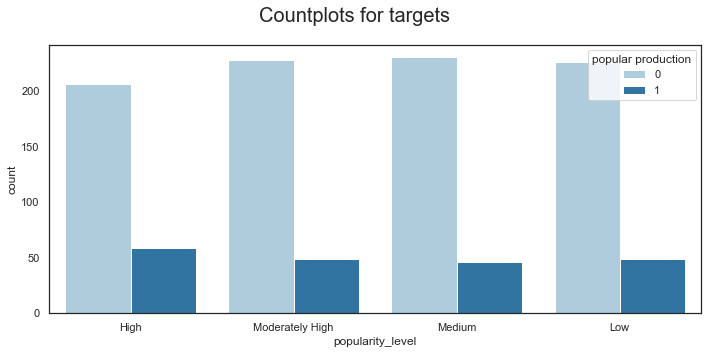

In [146]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["popular production"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

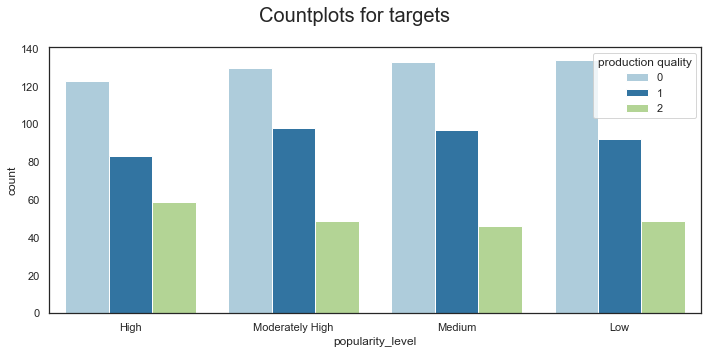

In [147]:
dataset["production quality"] = dataset["popular production"] + dataset["bigimpact production"]

sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["production quality"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

- 2 indicates production company satisfy 2 criterias (high impact and produced many movies)
- 1 indicates production company satisfy 1 of the criteria
- 0 indicates production company does not satisfy any criteria of being a good production company

In [148]:
training_features.append("production quality")
training_features = [item for item in set(training_features)]
#num: [budget, runtime, vote_count, vote_average, tagline length, overview length, num_goodcast, production quality, popularity]
#cat: [release month, director_quality]
#important list: final_goodcast, inexperienced_director, final_baddirector, popular_production, selected_production
training_features

['vote_count',
 'tagline length',
 'num_goodcast',
 'director_quality',
 'budget_adj',
 'production quality',
 'release_month',
 'overview length',
 'vote_average',
 'popularity',
 'runtime',
 'popularity_level']

### feature extraction from keywords

#### one hot encode

In [149]:
OHE_keywords = onehotencode(dataset,"keywords")

In [150]:
OHE_keywords

17th century  1930s  1970s  3d  3d animation  admiration  adolescence  \
0                0      0      0   0             0           0            0   
1                0      0      0   0             0           0            0   
2                0      0      0   0             0           0            0   
3                0      0      0   0             0           0            0   
4                0      0      0   0             0           0            0   
...            ...    ...    ...  ..           ...         ...          ...   
1088             0      0      0   0             0           0            0   
1089             0      0      0   0             0           0            0   
1090             0      0      0   0             0           0            0   
1091             0      0      0   0             0           0            0   
1092             0      0      0   0             0           0            0   

      adoption  adoptive mother  adult as a child  adultery  advancement  \
0            0                0                 0         0            0   
1            0                0                 0         0            0   
2            0                0                 0         0            0   
3            0                0                 0         0            0   
4            0                0                 0         0            0   
...        ...              ...               ...       ...          ...   
1088         0                0                 0         0            0   
1089         0                0                 0         0            0   
1090         0                0                 0         0            0   
1091         0                0                 0         0            0   
1092         0                0                 0         0            0   

      adventure  advice  aerobics  afghanistan  africa  african american  \
0             0       0         0            0       0                 0   
1             0       0         0            0       0                 0   
2             0       0         0            0       0                 0   
3             0       0         0            0       0                 0   
4             0       0         0            0       0                 0   
...         ...     ...       ...          ...     ...               ...   
1088          0       0         0            0       0                 0   
1089          0       0         0            0       0                 0   
1090          0       0         0            0       0                 0   
1091          0       0         0            0       0                 0   
1092          0       0         0            0       0                 0   

      aftercreditsstinger  afterlife  age difference  agent  agriculture  \
0                       0          0               0      0            0   
1                       0          0               0      0            0   
2                       0          0               0      0            0   
3                       0          0               0      0            0   
4                       0          0               0      0            0   
...                   ...        ...             ...    ...          ...   
1088                    0          0               0      0            0   
1089                    0          0               0      0            0   
1090                    0          0               0      0            0   
1091                    0          0               0      0            0   
1092                    0          0               0      0            0   

      aids  air force one  airplane  airport  alaska  alcohol  alcoholic  \
0        0              0         0        0       0        0          0   
1        0              0         0        0       0        0          0   
2        0              0         0        0       0        0          0   
3        0    

#### SelectKbest

In [151]:
# Perform feature selection using SelectKBest with chi-squared test
k = 1000 # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
selected_features = selector.fit_transform(OHE_keywords, dataset["popularity"]) 

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_keywords = OHE_keywords.columns[selected_indices]
selected_keywords = selected_keywords.tolist()

In [152]:
selected_keywords

['3d',
 '3d animation',
 'admiration',
 'adolescence',
 'adoption',
 'adultery',
 'advancement',
 'adventure',
 'advice',
 'afghanistan',
 'african american',
 'aftercreditsstinger',
 'age difference',
 'agent',
 'aids',
 'airplane',
 'alcohol',
 'alcoholic',
 'alcoholism',
 'algerian',
 'alice in wonderland',
 'alien',
 'alien attack',
 'alien planet',
 'alternate history',
 'alternative',
 'ambush',
 'american dream',
 'amnesia',
 'amusement park',
 'ancient greece',
 'ancient rome',
 'android',
 'animation',
 'antarctic',
 'anti terror',
 'apocalypse',
 'aquarium',
 'archer',
 'arena',
 'argentine president',
 'arms dealer',
 'arranged marriage',
 'artificial intelligence',
 'aspiring singer',
 'aspiring writer',
 'assault',
 'assistant',
 'aston martin',
 'atlanta',
 'auction',
 'aunt',
 'australia',
 'auto',
 'automobile racing',
 'axe murder',
 'baby',
 'babysitter',
 'bachelor',
 'bachelorette party',
 'bad boss',
 'badger',
 'bail',
 'bail jumper',
 'bakery',
 'ballet',
 'banis

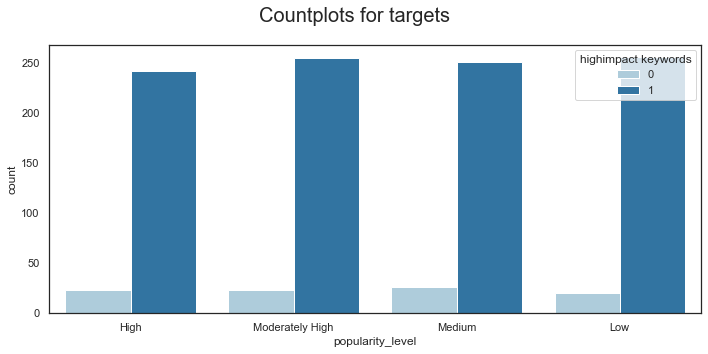

In [153]:
mlist = []
for keywords in selected_keywords:
    index = OHE_keywords.loc[OHE_keywords[keywords] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["highimpact keywords"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["highimpact keywords"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

#### separate good and bad from Kbest

In [154]:
badkeywords = []
for keywords in dataset.loc[(dataset["highimpact keywords"] != 0)&(dataset["popularity_level"] == "Low")]["keywords"].values:
    keywords = keywords.split("|")
    badkeywords.append(keywords)
badkeywords = [item for sublist in badkeywords for item in sublist]
badkeywords = set(badkeywords)

badkeywords2 = {}
for keywords in selected_keywords:
    if keywords in badkeywords:
        index = OHE_keywords.loc[OHE_keywords[keywords] != 0 ].index.tolist()
        badkeywords2[keywords] = dataset.iloc[index]["popularity"].mean()
        
final_badkeywords = []
for i,v in badkeywords2.items():
    if v < dataset["popularity"].mean():
        final_badkeywords.append(i)

In [155]:
goodkeywords = []
for keywords in dataset.loc[(dataset["highimpact keywords"] != 0)&(dataset["popularity_level"] == "High")]["keywords"].values:
    keywords = keywords.split("|")
    goodkeywords.append(keywords)
goodkeywords = [item for sublist in goodkeywords for item in sublist]
goodkeywords = set(goodkeywords)

goodkeywords2 = {}
for keywords in selected_keywords:
    if keywords in goodkeywords:
        index = OHE_keywords.loc[OHE_keywords[keywords] != 0 ].index.tolist()
        goodkeywords2[keywords] = dataset.iloc[index]["popularity"].mean()
        
final_goodkeywords = []
for i,v in goodkeywords2.items():
    if v > dataset["popularity"].mean():
        final_goodkeywords.append(i)

In [156]:
final_badkeywords

['3d animation',
 'admiration',
 'adolescence',
 'adoption',
 'adultery',
 'advancement',
 'adventure',
 'advice',
 'afghanistan',
 'african american',
 'aftercreditsstinger',
 'age difference',
 'aids',
 'airplane',
 'alcohol',
 'alcoholic',
 'alcoholism',
 'algerian',
 'alien planet',
 'american dream',
 'amusement park',
 'ancient rome',
 'antarctic',
 'anti terror',
 'aquarium',
 'argentine president',
 'arranged marriage',
 'aspiring singer',
 'aspiring writer',
 'assault',
 'atlanta',
 'auction',
 'aunt',
 'automobile racing',
 'axe murder',
 'baby',
 'babysitter',
 'bachelorette party',
 'bail',
 'ballet',
 'bankrupt',
 'bar',
 'baseball',
 'based on comic strip',
 'based on play',
 'based on stage musical',
 'based on true events',
 'based on video game',
 'bathtub',
 'battering',
 'beach',
 'beating',
 'becoming an adult',
 'beer',
 'beforecreditsstinger',
 'bicycle courier',
 'billard',
 'biohazard',
 'birthday',
 'black people',
 'blackmail',
 'blaxploitation',
 'blood splat

In [157]:
final_goodkeywords

['3d',
 'agent',
 'alice in wonderland',
 'alien',
 'alien attack',
 'alternate history',
 'alternative',
 'amnesia',
 'ancient greece',
 'android',
 'animation',
 'apocalypse',
 'archer',
 'arena',
 'arms dealer',
 'artificial intelligence',
 'assistant',
 'aston martin',
 'australia',
 'auto',
 'bad boss',
 'badger',
 'banishment',
 'bank',
 'barcelona spain',
 'barrier ice',
 'based on comic book',
 'based on graphic novel',
 'based on novel',
 'bdsm',
 'best friend',
 'betrayal',
 'black magic',
 'blacksmith',
 'blue footed booby',
 'bomber',
 'bone',
 'botanist',
 'bounty hunter',
 'boxing day',
 'boy',
 'broken arm',
 'broom',
 'budapest',
 'cage',
 'camcorder',
 'captain',
 'car',
 'car explosion',
 'car race',
 'cartoon',
 'caste system',
 'catastrophe',
 'chase',
 'cheating husband',
 'child vampire',
 'china',
 'chosen one',
 'christmas party',
 'cinema',
 'coma',
 'comic',
 'community',
 'computer',
 'conservatory',
 'cook',
 'cops and robbersÂ\xa0',
 'corruption',
 'creativ

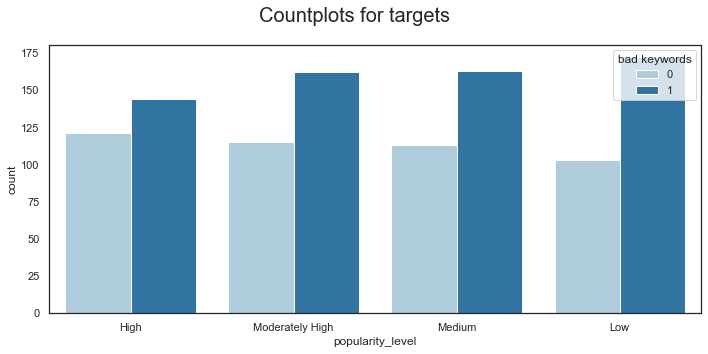

In [158]:
mlist = []
for keywords in final_badkeywords:
    index = OHE_keywords.loc[OHE_keywords[keywords] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["bad keywords"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["bad keywords"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

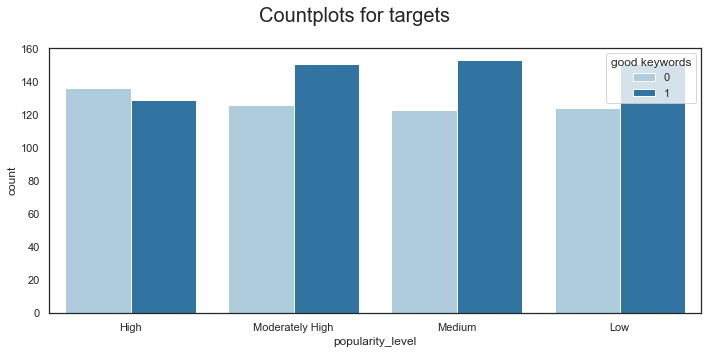

In [159]:
mlist = []
for keywords in final_goodkeywords:
    index = OHE_keywords.loc[OHE_keywords[keywords] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["good keywords"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["good keywords"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

In [160]:
dataset["keyword quality"] = -dataset["bad keywords"]+dataset["good keywords"]

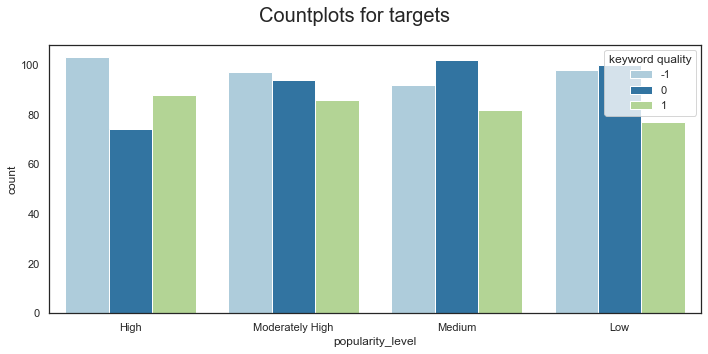

In [161]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["keyword quality"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

In [162]:
training_features.append("keyword quality")

#num: [budget, revenue, runtime, vote_count, vote_average, tagline length, overview length, num_goodcast, production quality, keyword quality]
#cat: [release month, director_quality]
#important list: final_goodcast, inexperienced_director, final_baddirector, popular_production, selected_production,final_badkeywords,final_goodkeywords 
training_features

['vote_count',
 'tagline length',
 'num_goodcast',
 'director_quality',
 'budget_adj',
 'production quality',
 'release_month',
 'overview length',
 'vote_average',
 'popularity',
 'runtime',
 'popularity_level',
 'keyword quality']

#### feature extraction from genre

In [163]:
OHE_genre = onehotencode(dataset,"genres")

In [164]:
OHE_genre

Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  \
0          1          1          0       0      0            0      0       0   
1          1          1          0       0      0            0      0       0   
2          0          1          0       0      0            0      1       0   
3          1          1          0       0      0            0      0       0   
4          0          1          0       0      0            0      0       0   
...      ...        ...        ...     ...    ...          ...    ...     ...   
1088       1          0          1       1      0            0      0       1   
1089       0          0          0       0      0            0      1       0   
1090       0          0          0       1      0            0      0       0   
1091       0          0          0       1      0            0      1       0   
1092       0          0          0       0      0            0      0       0   

      Fantasy  Foreign  History  Horror  Music  Mystery  Romance  \
0           0        0        0       0      0        0        0   
1           0        0        0       0      0        0        0   
2           0        0        0       0      0        0        0   
3           0        0        0       0      0        0        0   
4           0        0        0       0      0        0        0   
...       ...      ...      ...     ...    ...      ...      ...   
1088        0        0        0       0      0        0        0   
1089        0        0        0       0      0        0        0   
1090        0        0        0       0      0        0        0   
1091        0        0        0       0      0        0        0   
1092        0        0        0       0      0        0        0   

      Science Fiction  Thriller  War  Western  
0                   1         1    0        0  
1                   1         1    0        0  
2                   1         0    0        0  
3                   1         0    0        0  
4                   1         1    0        0  
...               ...       ...  ...      ...  
1088                0         0    0        0  
1089                0         0    0        0  
1090                0         0    0        0  
1091                0         0    0        0  
1092                0         1    0        0  

[1093 rows x 19 columns]

#### SelectKbest

In [165]:
# Perform feature selection using SelectKBest with chi-squared test
k = 4 # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
selected_features = selector.fit_transform(OHE_genre, dataset["popularity_level"]) 

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_genre = OHE_genre.columns[selected_indices]
selected_genre = selected_genre.tolist()

In [166]:
selected_genre

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [167]:
mlist = []
for genre in selected_genre:
    index = OHE_genre.loc[OHE_genre[genre] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]
dataset["highimpact genre"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

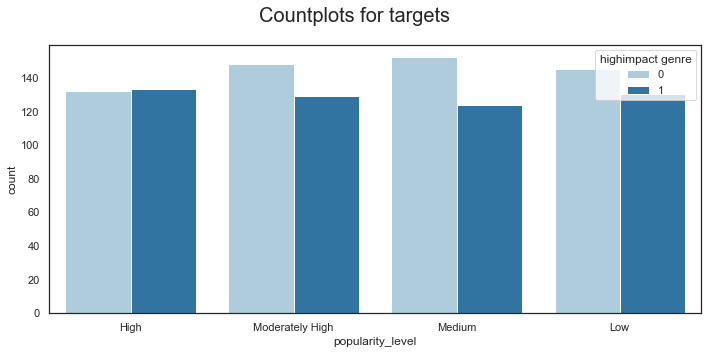

In [168]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["highimpact genre"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

the list of selected genre of 4 out of 19 genres seems to be popular, we will directly use this as the feature

In [169]:
training_features.append("highimpact genre")
training_features = [item for item in set(training_features)]
#num: [budget_adj, runtime, vote_count, vote_average, tagline length, overview length, num_goodcast, production quality, keyword quality, popularity, popularity_level]
#cat: [release month, director_quality, highimpact genre]
#important list: final_goodcast, inexperienced_director, final_baddirector, popular_production, selected_production,final_badkeywords,final_goodkeywords, selected_genre 
training_features

['vote_count',
 'tagline length',
 'num_goodcast',
 'director_quality',
 'budget_adj',
 'production quality',
 'highimpact genre',
 'release_month',
 'keyword quality',
 'overview length',
 'vote_average',
 'popularity',
 'runtime',
 'popularity_level']

## Preprocessing

In the previous section, we have explored the data and found a few ways to extract the features from raw data. In this section, we will need to create a pipeline to transform the features for both training and test datasets

In [170]:
def get_release_month(dataset):
    dataset['release_date'] = pd.to_datetime(dataset['release_date'])
    dataset["release_month"] = dataset["release_date"].apply(lambda x : x.month)
    return dataset
def get_length(dataset):
    dataset["title length"] = dataset["original_title"].apply(lambda x: getlength(x))
    dataset["tagline length"] = dataset["tagline"].apply(lambda x: getlength(x))
    dataset["overview length"] = dataset["overview"].apply(lambda x: getlength(x))
    return dataset
#=======================================================
def calc_accum(listitem, x):
    i = 0
    for item in listitem:
        if item in x:
            i+=1
    return i
def get_num_goodcast(final_goodcast, dataset):
    dataset["num_goodcast"] = dataset["cast"].apply(lambda x : calc_accum(final_goodcast, x))
    return dataset
#=======================================================
def calc(listitem, x):
    i = 0
    for item in listitem:
        if item in x:
            i+=1
    if i > 0:
        return 1
    else:
        return 0
def get_director_quality(final_baddirector, inexperienced_director, dataset):
    dataset["bad director"] = dataset["director"].apply(lambda x : calc(final_baddirector, x))
    dataset["inexperienced_director"] = dataset["director"].apply(lambda x : calc(inexperienced_director, x))
    dataset["director_quality"] = ((dataset["inexperienced_director"] + dataset["bad director"])/2).apply(lambda x: int(x+0.5))
    return dataset
def get_production_quality(selected_production, popular_production, dataset):
    dataset["bigimpact production"] = dataset["production_companies"].apply(lambda x : calc(selected_production, x))
    dataset["popular production"] = dataset["production_companies"].apply(lambda x : calc(popular_production, x))
    dataset["production quality"] = dataset["popular production"] + dataset["bigimpact production"]
    return dataset
def get_keyword_quality(final_badkeywords, final_goodkeywords, dataset):
    dataset["bad keywords"] = dataset["keywords"].apply(lambda x : calc(final_badkeywords, x))
    dataset["good keywords"] = dataset["keywords"].apply(lambda x : calc(final_goodkeywords, x))
    dataset["keyword quality"] = -dataset["bad keywords"]+dataset["good keywords"]
    return dataset
def get_highimpact_genre(selected_genre, dataset):
    dataset["highimpact genre"] = dataset["genres"].apply(lambda x : calc(selected_genre, x))
    return dataset

def getall(dataset1, final_goodcast, final_baddirector, inexperienced_director, selected_production, popular_production, final_badkeywords, final_goodkeywords, selected_genre):
    dataset = dataset1.copy()
    dataset = get_release_month(dataset)
    dataset = get_length(dataset)
    dataset = get_num_goodcast(final_goodcast, dataset)
    dataset = get_director_quality(final_baddirector, inexperienced_director, dataset)
    dataset = get_production_quality(selected_production, popular_production, dataset)
    dataset = get_keyword_quality(final_badkeywords, final_goodkeywords, dataset)
    dataset = get_highimpact_genre(selected_genre, dataset)
    return dataset

In [254]:
def catpop(x):
    if x == "Low":
        return 0
    elif x == "Medium":
        return 1
    elif x == "Moderately High":
        return 2
    elif x == "High":
        return 3

In [255]:
dataset_train["popularity_level_num"] = dataset_train["popularity_level"].apply(lambda x : catpop(x))
dataset_test["popularity_level_num"] = dataset_test["popularity_level"].apply(lambda x : catpop(x))

This set of training features and target feature tries to predict profit of a given movie 

In [257]:
#num: [budget_adj, runtime, vote_count, vote_average, tagline length, overview length, num_goodcast, production quality, keyword quality, popularity, popularity_level]
#cat: [release month, director_quality, highimpact genre]
#important list: final_goodcast, inexperienced_director, final_baddirector, popular_production, selected_production,final_badkeywords,final_goodkeywords, selected_genre 

training_features = [
                     'budget_adj',
#                      'revenue_adj',
                     'runtime',
                     'vote_count',
                     'vote_average',
#                      'profit',
                     'release_month',
                     'tagline length',
                     'overview length',
                     'num_goodcast',
                     'director_quality',
                     'production quality',
                     'keyword quality',
                     'highimpact genre',
                     'popularity_level_num',
#                      'popularity'
                    ]

target_feature = [
#                   'profit_groups',
                  'profitability'
                 ]


num_cols = [
            'budget_adj',
#             'revenue_adj',
            "runtime", 
            "vote_count", 
            "vote_average", 
            "tagline length", 
            "overview length", 
            "num_goodcast", 
            "production quality", 
            "keyword quality",
            "popularity_level_num",
#             "popularity"
           ]
cat_cols = [
            "release_month",
            "director_quality", 
            "highimpact genre"
           ]

In [258]:
# pathsegment = "/cpiestage/jtlau/DS_project/test/"
# dataset = pd.read_csv(f'{pathsegment}/TMBD Movie Dataset.csv')
# dataset = getall(dataset, final_goodcast, final_baddirector, inexperienced_director, selected_production, popular_production, final_badkeywords, final_goodkeywords, selected_genre)

In [259]:
dataset_train_preprocessed = getall(dataset_train, final_goodcast, final_baddirector, inexperienced_director, selected_production, popular_production, final_badkeywords, final_goodkeywords, selected_genre)
dataset_train_preprocessed = dataset_train_preprocessed.reset_index(drop = True)
dataset_test_preprocessed = getall(dataset_test, final_goodcast, final_baddirector, inexperienced_director, selected_production, popular_production, final_badkeywords, final_goodkeywords, selected_genre)
dataset_test_preprocessed = dataset_test_preprocessed.reset_index(drop = True)

In [260]:
# preprocessor and pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [261]:
preprocessor = ColumnTransformer([('cat', OneHotEncoder(drop='if_binary'), cat_cols),
                                  ('num', StandardScaler(), num_cols)])
X_train_prepared = preprocessor.fit_transform(dataset_train_preprocessed[training_features])
X_test_prepared = preprocessor.transform(dataset_test_preprocessed[training_features])

y_train = dataset_train_preprocessed[target_feature]
y_test = dataset_test_preprocessed[target_feature]

## Modelling

In [262]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.1.2.


In [263]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb

# evaluations
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# model selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Lets try some simple models such as logistic regression, adaboost

### Logistic regression

mean cv macro_f1 score: 0.689
              precision    recall  f1-score   support

           0       0.34      0.84      0.49        32
           1       0.96      0.68      0.79       161

    accuracy                           0.70       193
   macro avg       0.65      0.76      0.64       193
weighted avg       0.85      0.70      0.74       193



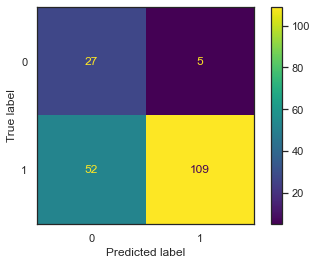

In [264]:
lr = LogisticRegression(max_iter=500, class_weight='balanced')
lr_scores = cross_val_score(lr, X_train_prepared, y_train, scoring='f1_macro', cv=5)                            
print("mean cv macro_f1 score: {}".format(round(lr_scores.mean(),3)))

lr.fit(X_train_prepared, y_train)
y_test_pred = lr.predict(X_test_prepared)

print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()

### Adaboost

mean cv macro_f1 score: 0.711
              precision    recall  f1-score   support

           0       0.35      0.75      0.48        32
           1       0.94      0.72      0.81       161

    accuracy                           0.73       193
   macro avg       0.64      0.74      0.64       193
weighted avg       0.84      0.73      0.76       193



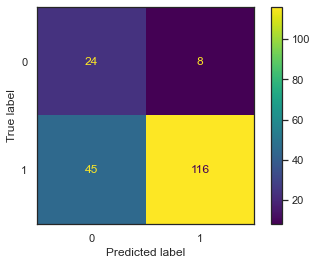

In [179]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, class_weight='balanced'))
ada_scores = cross_val_score(ada, X_train_prepared, y_train, scoring='f1_macro', cv=5)
print("mean cv macro_f1 score: {}".format(round(ada_scores.mean(),3)))

ada.fit(X_train_prepared, y_train)
y_test_pred = ada.predict(X_test_prepared)

print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred, labels=ada.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada.classes_)
disp.plot()

### SVM

mean cv macro_f1 score: 0.652
              precision    recall  f1-score   support

           0       0.32      0.72      0.44        32
           1       0.93      0.70      0.79       161

    accuracy                           0.70       193
   macro avg       0.62      0.71      0.62       193
weighted avg       0.83      0.70      0.74       193



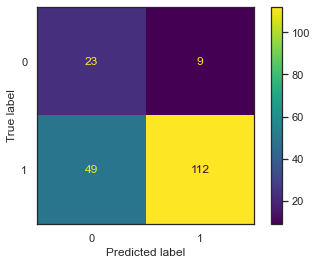

In [180]:
svc = SVC(class_weight='balanced')
svc_scores = cross_val_score(svc, X_train_prepared, y_train, scoring='f1_macro', cv=5)
print("mean cv macro_f1 score: {}".format(round(svc_scores.mean(),3)))

svc.fit(X_train_prepared, y_train)
y_test_pred = svc.predict(X_test_prepared)

print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()

## Hyperparameters tuning

### Linear model - kernel SVM <a name='5.2.1'></a>

In [181]:
param_grid = {'kernel': ['rbf', 'poly'],
              'degree' : [2,3,4,5],
              'gamma': ['scale', 0.01, 0.1, 1],
              'C': [ 0.1, 0.5, 1, 1.5, 2, 2.5],
              "decision_function_shape" : ['ovo','ovr']
             }

#class weight balance for auto scaling of weights based on inverse frequency
svm_gs = GridSearchCV(estimator=SVC(class_weight='balanced'),
                      param_grid=param_grid, scoring='f1_macro', cv=5)

svm_gs.fit(X_train_prepared, y_train)

print(svm_gs.best_params_)
print(svm_gs.best_score_)

params = {}
params['kernel'] = svm_gs.best_params_['kernel']
params['gamma'] = svm_gs.best_params_['gamma'] 
params['degree'] = svm_gs.best_params_['degree'] 
params['C'] = svm_gs.best_params_['C']
params["decision_function_shape"] = svm_gs.best_params_["decision_function_shape"]

final_mdl = SVC(**params,class_weight='balanced')
final_mdl 

{'C': 2.5, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
0.6714586628091134


SVC(C=2.5, class_weight='balanced', decision_function_shape='ovo', degree=2)

              precision    recall  f1-score   support

           0       0.34      0.72      0.46        32
           1       0.93      0.73      0.82       161

    accuracy                           0.73       193
   macro avg       0.64      0.72      0.64       193
weighted avg       0.83      0.73      0.76       193



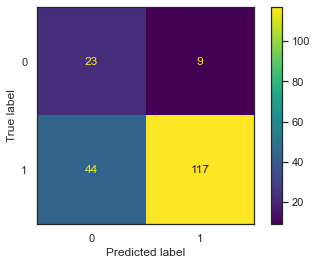

In [182]:
final_mdl.fit(X_train_prepared, y_train)
y_test_pred = final_mdl.predict(X_test_prepared)

print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred, labels=final_mdl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_mdl.classes_)
disp.plot()

### LGBM

In [265]:
params = {
    'metric': 'multi_logloss',
}

param_grid = {
    'learning_rate': [0.05],
    'n_estimators': [100],
    'num_leaves': [20], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt'], 
    'reg_alpha' : [0.3],
    'reg_lambda' : [0.3],
    'max_depth' : [4],
    'min_child_weight': [0.01],
    'min_child_samples': [10],
    'cat_smooth':[0],
    'colsample_bytree':[0.8],   #feature fraction
    'subsample':[0.8],         #bagging fraction
    'subsample_freq':[4],        #bagging freq
    'min_split_gain' : [0.6],
    }



mdl = lgb.LGBMClassifier(objective = 'binary',
#           num_class = 2,
          is_unbalance = True
        ) 

lgbm_gs = GridSearchCV(mdl, param_grid=param_grid, verbose=1, scoring='f1_macro', cv=5)

lgbm_gs.fit(X_train_prepared, y_train)

print(lgbm_gs.best_params_)
print(lgbm_gs.best_score_)

params = {}
hyperparams = ['learning_rate', 
               'n_estimators', 
               'num_leaves', 
               'boosting_type', 
               'reg_alpha',
               'reg_lambda', 
               'max_depth', 
               'min_child_weight', 
               'min_child_samples',
               'cat_smooth', 
               'colsample_bytree',
               'subsample',  
               'subsample_freq',
               'min_split_gain' 
              ]

for param in hyperparams:
    params[param] = lgbm_gs.best_params_[param]

lgb_final_mdl = lgb.LGBMClassifier(**params,
          objective = 'binary',
#           num_class = 2,
          is_unbalance = True
         )

lgb_final_mdl.fit(X_train_prepared, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'boosting_type': 'gbdt', 'cat_smooth': 0, 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_samples': 10, 'min_child_weight': 0.01, 'min_split_gain': 0.6, 'n_estimators': 100, 'num_leaves': 20, 'reg_alpha': 0.3, 'reg_lambda': 0.3, 'subsample': 0.8, 'subsample_freq': 4}
0.7393476753618073


LGBMClassifier(cat_smooth=0, colsample_bytree=0.8, is_unbalance=True,
               learning_rate=0.05, max_depth=4, min_child_samples=10,
               min_child_weight=0.01, min_split_gain=0.6, num_leaves=20,
               objective='binary', reg_alpha=0.3, reg_lambda=0.3, subsample=0.8,
               subsample_freq=4)

              precision    recall  f1-score   support

           0       0.37      0.78      0.51        32
           1       0.94      0.74      0.83       161

    accuracy                           0.75       193
   macro avg       0.66      0.76      0.67       193
weighted avg       0.85      0.75      0.78       193



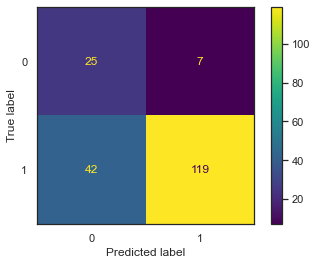

In [266]:
lgb_final_mdl.fit(X_train_prepared, y_train)
y_test_pred = lgb_final_mdl.predict(X_test_prepared)

print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred, labels=final_mdl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_mdl.classes_)
disp.plot()

### Neural Network

In [185]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as tfl
from tensorflow.keras.models import Model

In [186]:
METRICS = [
      keras.metrics.CategoricalAccuracy(name='accuracy'),
      #keras.metrics.TruePositives(name='tp'),         #these metrics only work for binary, we will use our custom made metric
      #keras.metrics.FalsePositives(name='fp'),
      #keras.metrics.TrueNegatives(name='tn'),
      #keras.metrics.FalseNegatives(name='fn'), 
      #keras.metrics.Precision(name='precision'),
      #keras.metrics.Recall(name='recall'),
      #keras.metrics.AUC(name='auc'),  # area under the roc curve
      #keras.metrics.AUC(name='prc', curve='PR') # area under precision-recall curve
]

def build_model(num_features, metrics=METRICS, output_bias=None):
    # set initial bias to log of the odds
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
        
    inputs = tfl.Input(shape=(num_features,))
    A1 = tfl.Dense(units=16, activation='relu')(inputs)
    A2 = tfl.Dense(units=32, activation='relu')(A1)
    D1 = tfl.Dropout(0.5)(A2)                                #drop out regularization
    outputs = tfl.Dense(units=5, activation='softmax', bias_initializer=output_bias)(D1)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=metrics)

    return model

def plot_loss(history, label, n):
    plt.figure(dpi=100, figsize=(6, 4))
    plt.plot(history.epoch, 
             history.history['loss'],
             color=colors[n], 
             label='Train ' + label)
    plt.plot(history.epoch, 
             history.history['val_loss'],
             color=colors[n], 
             label='Test ' + label,
             linestyle='--')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
def plot_metrics(history):
    plt.figure(dpi=100, figsize=(12, 8))
    metrics = ['accuracy']
    for i, metric in enumerate(metrics):
        plt.subplot(2, 2, i+1)
        plt.plot(history.epoch, 
                 history.history[metric], 
                 color=colors[1],
                 label='Train')
        plt.plot(history.epoch, 
                 history.history['val_' + metric], 
                 color=colors[1],
                 label='Test',
                 linestyle='--')
        plt.xlabel('Epoch')
        plt.ylabel(metric.capitalize())
        plt.legend()
    plt.tight_layout(pad=1.5)

In [187]:
weights = []
n_samples = len(y_train)
n_classes = len(np.unique(y_train))
counts = y_train[target_feature[0]].groupby(y_train[target_feature[0]]).count()
#weight dictionaries <-- to demonstrate gridsearch cv using different weights
class_weight_dict = {
                     0 : n_samples/(n_classes*counts.loc[0]),
                     1 : n_samples/(n_classes*counts.loc[1]),
#                      2 : n_samples/(n_classes*counts.loc[2]),
#                      3 : n_samples/(n_classes*counts.loc[3]),
#                      4 : n_samples/(n_classes*counts.loc[4])
                    }

class_weight_dict2 = {
                     0 : n_samples/(n_classes*counts.loc[0])*1.5,
                     1 : n_samples/(n_classes*counts.loc[1]),
#                      2 : n_samples/(n_classes*counts.loc[2]),
#                      3 : n_samples/(n_classes*counts.loc[3])*1.5,
#                      4 : n_samples/(n_classes*counts.loc[4])*1.5
                    }

In [188]:
class_weight_dict

{0: 2.3454935622317596, 1: 0.6354651162790698}

In [189]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support
import itertools

#pre processing
param_grid = {'class_weight' : [class_weight_dict,class_weight_dict2],
              'EPOCHS' : [10,20,30,40,50],
              'BATCH_SIZE' : [5,10,20,25]
             }  #to demonstrate gridsearchcv on KERAS neuralnetwork, no tuning of nn model in this excercise, however it is possible

gridscore = {}

#generate grid from param_grid
keys, values = zip(*param_grid.items())
grid = [dict(zip(keys, v)) for v in itertools.product(*values)]

#loop through grid
for i in range(len(grid)):
    f1_macrolist = []

    #kfold-cv
    kf = KFold(n_splits=2)
    for train_index, test_index in kf.split(X_train_prepared):

        #split train set
        X_train, X_test = X_train_prepared[train_index], X_train_prepared[test_index]
        y_traink, y_testk = np.array(y_train).flatten()[train_index], np.array(y_train).flatten()[test_index]

        #for NN
        train_features = X_train
        train_labels = np.array(y_traink)
        test_features = X_test
        test_labels = np.array(y_testk)

        #build model
        EPOCHS = grid[i]['EPOCHS']
        BATCH_SIZE = grid[i]['BATCH_SIZE']

        model = build_model(num_features=X_train_prepared.shape[-1],
                           )
        #model.summary()

        #fit model
        baseline_history = model.fit(train_features, train_labels,
                                 batch_size=BATCH_SIZE,
                                 epochs=EPOCHS,
                                 validation_data=(test_features, test_labels),
                                 class_weight= grid[i]['class_weight'],  #use inverse frequency weights
                                 verbose = 0
                                )
        #validate on "test" (still within train set)
        y_test_pred = model.predict(X_test)
        idx = np.argmax(y_test_pred, axis=-1)

        #append f1_macro results
#         f1_macrolist.append(precision_recall_fscore_support(y_testk, idx, average='weighted'))
        f1_macrolist.append(precision_recall_fscore_support(y_testk, idx, average='macro')[2]) #0: precision, #1: recall, #2: f1
#         f1_macrolist.append(precision_recall_fscore_support(y_testk, idx, average='micro'))

    f1_macro_mean = np.mean(f1_macrolist) 
    gridscore[str(grid[i])] = f1_macro_mean

18/18 [==============================] - 0s 530us/step


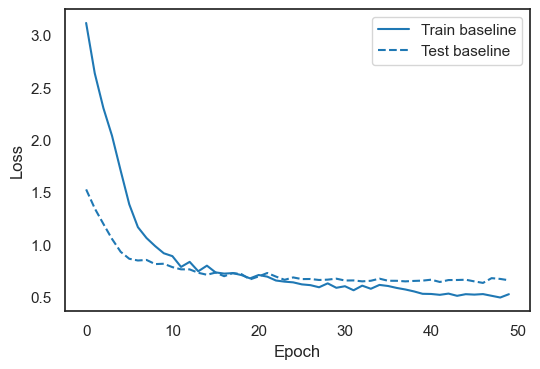

In [190]:
plot_loss(baseline_history, 'baseline', 1)

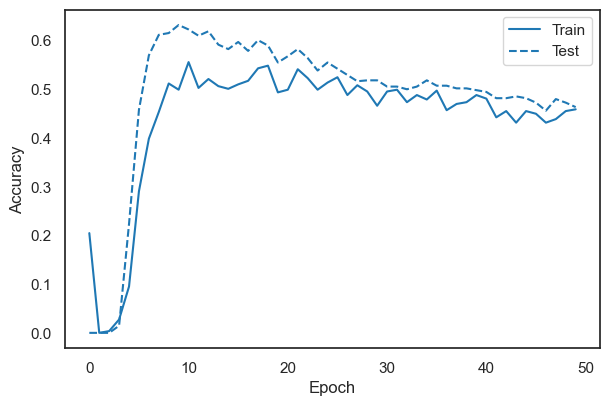

In [191]:
plot_metrics(baseline_history)

In [192]:
best_score = max(gridscore.values())
best_params = max(gridscore, key=gridscore.get)
print("grid_best_params: {}\ngrid_best_score: {}".format(best_params, round(best_score,3)))

grid_best_params: {'class_weight': {0: 2.3454935622317596, 1: 0.6354651162790698}, 'EPOCHS': 50, 'BATCH_SIZE': 10}
grid_best_score: 0.672


In [193]:
#use optimal hyperparameters from gridsearchcv to predict test set

EPOCHS = 50  #we can also find best epoch and best batch size from gridsearchcv
BATCH_SIZE = 10
model = build_model(num_features=X_train_prepared.shape[-1],
                        )

train_features = X_train_prepared
train_labels = np.array(y_train)
test_features = X_test_prepared
test_labels = np.array(y_test)

model_history = model.fit(train_features, train_labels,
                          batch_size=BATCH_SIZE,
                          epochs=EPOCHS,
                          validation_data=(test_features, test_labels),
                          class_weight=class_weight_dict,  #determined from gridsearchcv
                          verbose = 0
                         )

7/7 [==============================] - 0s 667us/step
              precision    recall  f1-score   support

           0       0.35      0.75      0.48        32
           1       0.94      0.72      0.81       161

    accuracy                           0.73       193
   macro avg       0.64      0.74      0.64       193
weighted avg       0.84      0.73      0.76       193



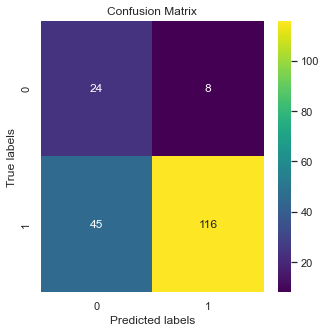

In [194]:
y_test_pred = model.predict(X_test_prepared)
idx = np.argmax(y_test_pred, axis=-1)

print(classification_report(y_test, idx))
#print(confusion_matrix(y_test1, idx))
cm = confusion_matrix(y_test, idx)

fig, ax= plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap = 'viridis');  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


### Kmeans

In [210]:
#function to get cluster label to class encoding
def getencoding(train_result, n_clust):
    kmean_encode = {}
    for i in range (0,n_clust):
        c_value = train_result[train_result['labels']==i]
        c_value['scaled_counts'] = c_value['y_train_num'].apply(lambda x : class_weight_dict[x]) # here we scale counts by inverse frequency 
        groupcount = c_value.groupby(['y_train_num'])['scaled_counts'].sum() # we sum up all the scaled counts for each cluster group by each class
        v = groupcount.loc[groupcount.values == groupcount.max()].index[0] # get the class with the max counts

        kmean_encode[i] = v #cluster_label = class
    return kmean_encode

In [211]:
#function to transform predicted cluster to class
def label_to_class(old_arr,kmean_encode):
    new_arr = []
    for i in old_arr:
        new_arr.append(kmean_encode[i])
    return np.array(new_arr)

In [214]:
from sklearn.cluster import KMeans

param_grid = {'n_clust' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
             }  

gridscore = {}

#generate grid from param_grid
keys, values = zip(*param_grid.items())
grid = [dict(zip(keys, v)) for v in itertools.product(*values)]

#loop through grid
for i in range(len(grid)):
    f1_macrolist = []

    #kfold-cv
    kf = KFold(n_splits=2)
    for train_index, test_index in kf.split(X_train_prepared):

        #split train set
        X_train, X_test = X_train_prepared[train_index], X_train_prepared[test_index]
        y_traink, y_testk = np.array(y_train).flatten()[train_index], np.array(y_train).flatten()[test_index]

        #kmeans
        n_clust = grid[i]['n_clust']
        kmeans = KMeans(n_clusters=n_clust, random_state=65)
        clusters_train = kmeans.fit_predict(X_train)
        
        #get labeldict from comparing with X_train with y_train
        labels = kmeans.labels_
        train_result = pd.DataFrame({'labels':labels.tolist(), 'y_train_num':list(y_traink)})
        labeldict = getencoding(train_result, n_clust)  
        
        #predict x_test
        cluster_test = kmeans.predict(X_test)
        
        #transform cluster label to class
        y_test_pred = label_to_class(cluster_test,labeldict)

        #append f1_macro results
        f1_macrolist.append(precision_recall_fscore_support(y_testk, y_test_pred, average='macro')[2]) # we use the f1_macro created from the custom scorer previously

    f1_macro_mean = np.mean(f1_macrolist)
    gridscore[str(grid[i])] = f1_macro_mean

In [215]:
best_score = max(gridscore.values())
best_params = max(gridscore, key=gridscore.get)
print("grid_best_params: {}\ngrid_best_score: {}".format(best_params, round(best_score,3)))

grid_best_params: {'n_clust': 5}
grid_best_score: 0.578


In [235]:
#use hyperparameters from gridsearchcv to fit on train data and test on test data
n_clust = 14 #obtained from gridsearchcv
kmeans = KMeans(n_clusters=n_clust, random_state=65)
clusters_train = kmeans.fit_predict(X_train_prepared)

#get label dict
labels = kmeans.labels_
train_result = pd.DataFrame({'labels':labels.tolist(), 'y_train_num':list(np.array(y_train).flatten())})
labeldict = getencoding(train_result, n_clust) 

#predict x_test
cluster_test = kmeans.predict(X_test_prepared)  
y_test_pred = label_to_class(cluster_test,labeldict)

              precision    recall  f1-score   support

           0       0.25      0.75      0.38        32
           1       0.92      0.55      0.69       161

    accuracy                           0.59       193
   macro avg       0.58      0.65      0.53       193
weighted avg       0.81      0.59      0.64       193



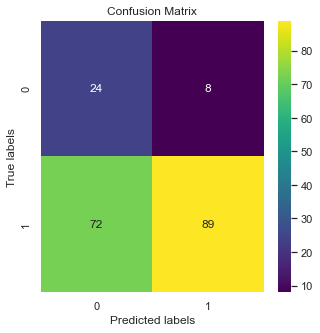

In [236]:
print(classification_report(y_test, y_test_pred))
#print(confusion_matrix(y_test1, idx))
cm = confusion_matrix(y_test, y_test_pred)

fig, ax= plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap = 'viridis');  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

## Feature importance analysis

### Interpretable model - LGBM -> inbuilt feature importance

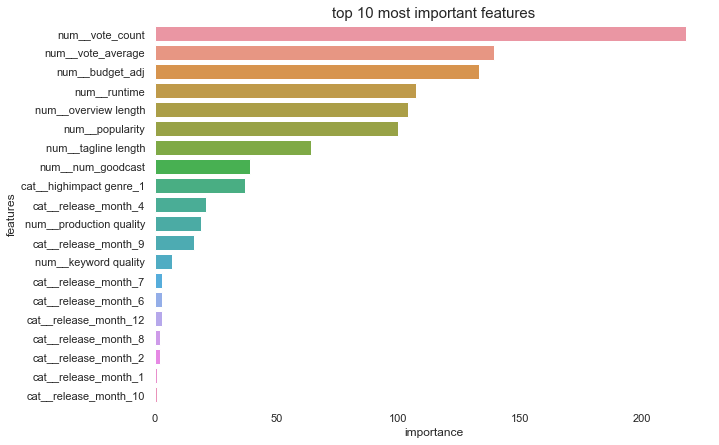

In [237]:
#run LGBM model before running this code
plt.figure(figsize=(10, 7))
feature_importance = pd.DataFrame({'features': preprocessor.get_feature_names_out(), 
                                   'importance': lgb_final_mdl.feature_importances_}).sort_values(by='importance', ascending=False)
sns.barplot(data=feature_importance[:20], y='features', x='importance')
sns.despine(left=True, bottom=True)
plt.title('top 10 most important features', fontsize=15);

### Agnostic model - Neural network -> using shap 

In [238]:
import shap
shap.initjs()

In [239]:
featurelist = preprocessor.get_feature_names_out()

In [240]:
#run neural network model before running this code
Xtrain = pd.DataFrame(X_train_prepared, columns= featurelist)
Xtest = pd.DataFrame(X_test_prepared, columns= featurelist)

In [241]:
#kernel explainer on train set
nn_explainer = shap.KernelExplainer(model.predict,Xtrain)

35/35 [==============================] - 0s 559us/step


In [242]:
# Calculate shap values from test set
shap_values = nn_explainer.shap_values(X = Xtest.iloc[:,:], nsamples = 20)   #takes n samples of any 2 features from all possible combinations

  0%|          | 0/193 [00:00<?, ?it/s]

684/684 [==============================] - 0s 510us/step


684/684 [==============================] - 0s 510us/step


684/684 [==============================] - 0s 498us/step


### global explainability

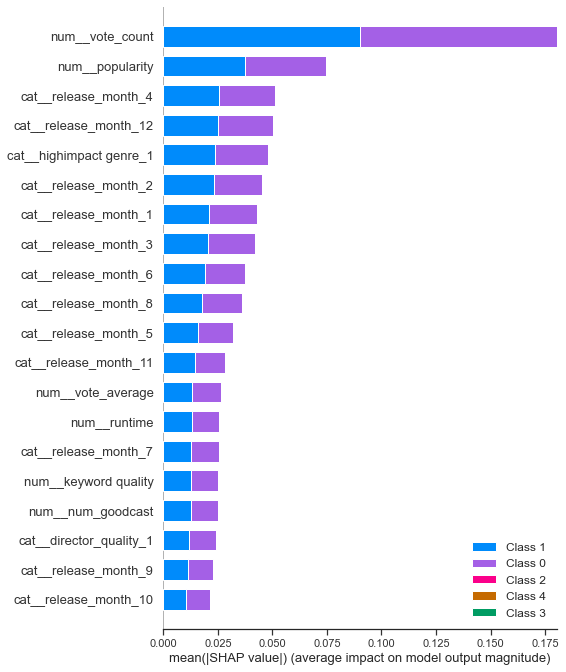

In [243]:
shap.summary_plot(shap_values = shap_values,
                      features = Xtest.iloc[:,:])

class : 0


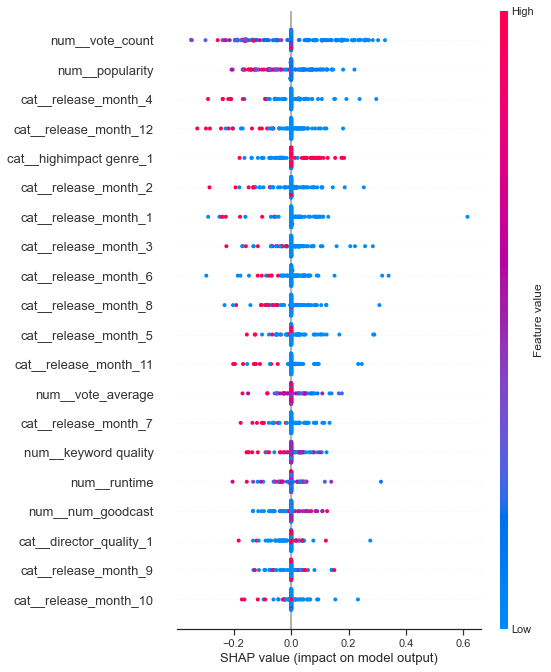

class : 1


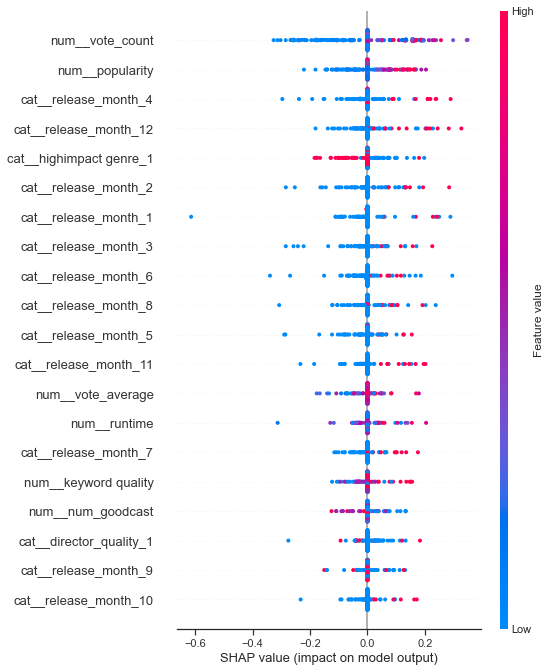

class : 2


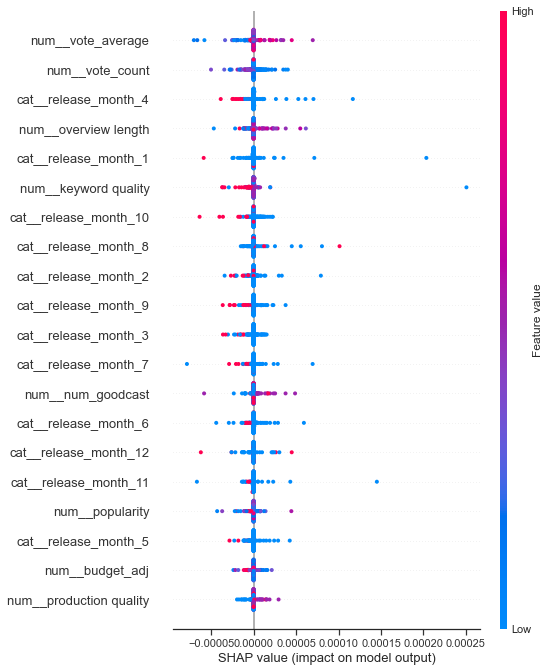

class : 3


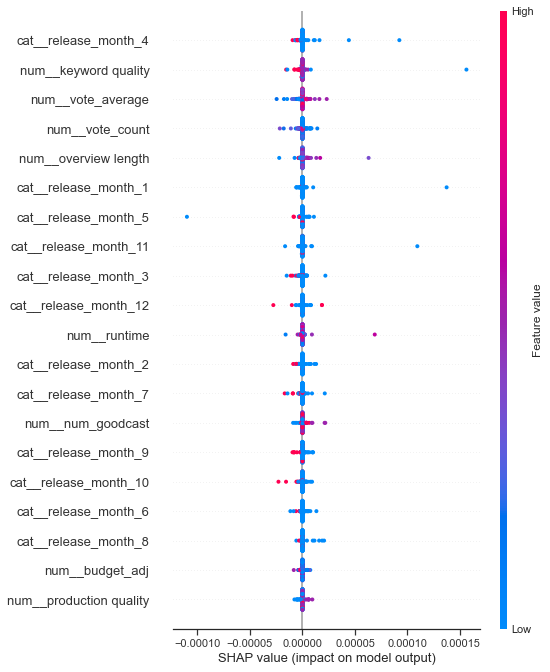

class : 4


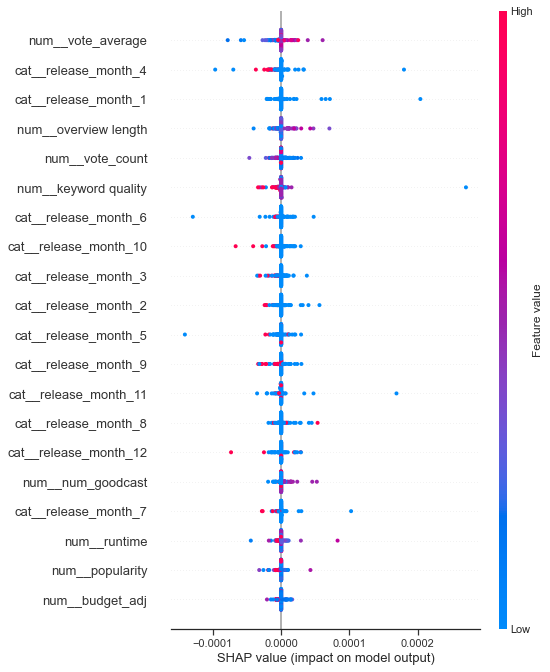

In [244]:
list_of_labels = [0,1,2,3,4]
for i in list_of_labels:
    print("class : {}".format(i))
    shap.summary_plot(shap_values = shap_values[i],
                      features = Xtest.iloc[:,:]
                      )

### local explainability - for first row of test data

In [245]:
shap_values = nn_explainer.shap_values(Xtest.iloc[0,:])

71592/71592 [==============================] - 38s 524us/step


In [246]:
import ipywidgets as widgets

# Create the list of all labels for the drop down list
list_of_labels = [0,1,2,3]

# Create a list of tuples so that the index of the label is what is returned
tuple_of_labels = list(zip(list_of_labels, range(len(list_of_labels))))

# Create a widget for the labels and then display the widget
current_label = widgets.Dropdown(options=tuple_of_labels,
                              value=0,
                              description='Select Label:'
                              )

# Display the dropdown list (Note: access index value with 'current_label.value')
current_label

Dropdown(description='Select Label:', options=((0, 0), (1, 1), (2, 2), (3, 3)), value=0)

In [247]:
#probability of class 0 is true = 0.32; #probability of class 2 is true = 0.09; etc...
#red features positively influence (bring it to 1), blue features negatively influence (bring it to 0)
shap.force_plot(nn_explainer.expected_value[current_label.value], shap_values[current_label.value], Xtest.iloc[0,:])